## Group 

    Rajoelimbololona Hasina Angelina
    Haingoharijao Faniriniaina Ramandiamanana
    Lloyd Acquaye Thompson
    Andriamarolahy Rabetokotany
    

In [0]:
import torch
import numpy as np
import pandas as pd

In [0]:
!pip install torchaudio

     |████████████████████████████████| 2.7MB 3.5MB/s 
     |████████████████████████████████| 773.1MB 24kB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


In [0]:
import torchaudio

In [0]:
import os
import glob

In [0]:
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [0]:
class AudioDataset(Dataset):
    """
    A rapper class for the UrbanSound8K dataset.
    """

    def __init__(self, file_path, audio_paths, folds):
        """
        Args:
            file_path(string): path to the audio csv file
            root_dir(string): directory with all the audio folds
            folds: integer corresponding to audio fold number or list of fold number if more than one fold is needed
        """
        self.audio_file = pd.read_csv(file_path)
        self.folds = folds
        self.audio_paths = glob.glob(audio_paths + '/*' + str(self.folds) + '/*')
    
    

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):
        
        audio_path = self.audio_paths[idx]
        audio, rate = torchaudio.load(audio_path, normalization=True)
        audio = audio.mean(0, keepdim=True)
        c, n = audio.shape
        zero_need = 160000 - n
        audio_new = F.pad(audio, (zero_need //2, zero_need //2), 'constant', 0)
        audio_new = audio_new[:,::5]
        
        #Getting the corresponding label
        audio_name = audio_path.split(sep='/')[-1]
        labels = self.audio_file.loc[self.audio_file.slice_file_name == audio_name].iloc[0,-2]
        
        return audio_new, labels

In [0]:
from IPython.display import Audio

In [0]:
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
!tar -xf UrbanSound8K.tar.gz

--2019-12-13 06:40:57--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  17.3MB/s    in 6m 1s   

2019-12-13 06:46:59 (15.9 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



# Load the Data from storage location

In [0]:
file_path = '/content/UrbanSound8K/metadata/UrbanSound8K.csv'
audio_path = '/content/UrbanSound8K/audio'

# Splitting the Loaded Data


In [0]:
dataset_train = AudioDataset(file_path = file_path, audio_paths = audio_path, folds = [1, 2, 3, 4, 5, 6, 7, 8, 9])
dataset_test = AudioDataset(file_path = file_path, audio_paths= audio_path, folds = 10)

In [0]:
dataset_train[0][0].shape

torch.Size([1, 32000])

In [0]:
dataset_test[0][0].shape

torch.Size([1, 32000])

In [0]:
Audio(dataset_train[0][0], rate = 8000)

# Build the Network / Model --M3

In [0]:
import torch.nn as nn
M3 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 256, 80, 4, padding = 38),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),

    #conv 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    nn.AvgPool1d(500),
    nn.Flatten(),
    nn.Linear(256, 10),
    nn.Softmax(1)
            )
audio = torch.zeros(10, 1, 32000)
M3(audio).shape

torch.Size([10, 10])

# Build the Network / Model --M5

In [0]:
M5 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 128, 80, 4, padding = 38),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(4),

    #conv 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(4),

    #conv 3
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4), 

    #Conv 4
    nn.Conv1d(256, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.MaxPool1d(4),

    
    nn.AvgPool1d(31),
#   # nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
            )
audio = torch.zeros(5, 1, 32000)
M5(audio).shape

torch.Size([5, 10])

# Build the Network / Model --M11

In [0]:
M11 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 64, 80, 4, padding = 38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.MaxPool1d(4),

    #conv 2, 1
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
     #conv 2, 2
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    #Conv 3, 1
    nn.Conv1d(64, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #Conv 3, 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    #Conv 4, 1
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #Conv 4, 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
    #Conv 4, 3
    nn.Conv1d(256, 256, 3, padding = 3),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
    #Conv 5, 1
    nn.Conv1d(256, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    #Conv 5, 2
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
             )
audio = torch.zeros(4, 1, 32000)
M11(audio).shape

torch.Size([4, 10])

# Build the Network / Model --M18

In [0]:
M18 = nn.Sequential(
    #Conv 1
    nn.Conv1d(1, 64, 80, 4, padding = 38),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.MaxPool1d(4),

    #conv 2, 1
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#   #conv 2, 2
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#   #Conv 2, 3
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    
#   #Conv 2, 4
    nn.Conv1d(64, 64, 3, padding = 1),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
#   #Conv 3, 1
    nn.Conv1d(64, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
#     #Conv 3, 2
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
#   #Conv 3, 3
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    #conv 3, 4
    nn.Conv1d(128, 128, 3, padding = 1),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    
    nn.MaxPool1d(4),
    
#   #Conv 4, 1
    nn.Conv1d(128, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
#   #Conv 4, 2
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
        
#   #Conv 4, 3
    nn.Conv1d(256, 256, 3, padding = 1),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    
#   #Conv 4, 4
    nn.Conv1d(256, 256, 3, padding = 3),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.MaxPool1d(4),
    
        
#   #Conv 5, 1
    nn.Conv1d(256, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
#   #Conv 5, 2
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
        
#   #Conv 5, 3
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
#   #Conv 5, 4
    nn.Conv1d(512, 512, 3, padding = 1),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(512, 10),
    nn.Softmax(1)
             )
audio = torch.zeros(3, 1, 32000)
M18(audio).shape

torch.Size([3, 10])

#Bonus
# Build the Network /Model--M34 Res

In [0]:

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


class ResNetModule(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(ResNetModule, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)
        self.batch1 = nn.BatchNorm1d(out_channels)
        self.relu1  = nn.ReLU()
        
        self.conv2  = nn.Conv1d(out_channels, out_channels, kernel_size, stride, padding)
        self.batch2 = nn.BatchNorm1d(out_channels)
        
        self.batch3 = nn.BatchNorm1d(out_channels)
        self.relu2  = nn.ReLU()
        
    def forward(self,x):
        x1 = self.conv1(x)
        x1 = self.batch1(x1)
        x1 = self.relu1(x1)
        
        x1 = self.conv2(x1)
        x1 = self.batch2(x1)
        
        # print(x1.shape, x.shape)
        if x1.shape[1] != x.shape[1]:
            x = x.repeat(1,2,1) # repeat with 2 by 2
        
        x = x1 + x
        x = self.batch3(x)
        x = self.relu2(x)
        return x

audio = torch.zeros(48,32000)
net  = ResNetModule(48,48,3,padding=1)
net(audio.unsqueeze(0)).shape


#Model

M34res = nn.Sequential(
    #conv1
    nn.Conv1d(1,48,kernel_size=80, stride=4, padding=38),
    nn.BatchNorm1d(48),
    nn.ReLU(),
 
    nn.MaxPool1d(4),
    
    ResNetModule(48,48,3,padding=1),
    ResNetModule(48,48,3,padding=1),
    ResNetModule(48,48,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(48,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    ResNetModule(96,96,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(96,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    ResNetModule(192,192,3,padding=1),
    
    nn.MaxPool1d(4),
    
    ResNetModule(192,384,3,padding=1),
    ResNetModule(384,384,3,padding=1),
    ResNetModule(384,384,3,padding=1),
    
    nn.AdaptiveAvgPool1d(1),
    nn.Flatten(),
    nn.Linear(384,10)
)
audio = torch.zeros(2, 1,32000)
M34res(audio).shape


torch.Size([2, 10])

# Function to Initialize the weights and biases

In [0]:
def weight_init(m):
  if isinstance(m, torch.nn.Conv1d):
    torch.nn.init.xavier_uniform_(m.weight)
  if isinstance(m, torch.nn.Linear):
    torch.nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0.01)

# Accuracy Function

In [0]:
def accuracy(output, target, topk = (1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)
        
        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))
        
        res =[]
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim = True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [0]:
from torch import optim


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Plot Function

In [0]:
def plot_loss_acc(train_loss,test_loss,train_acc,test_acc,i,name):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(16,4))

    plt.subplot(121)
    p1 = plt.plot(train_loss)
    p2 = plt.plot(test_loss)
    plt.legend((p1[0], p2[0]), ('train', 'test'))
    plt.title("train and test loss for " +name+ " model, using floder {} for test".format(i))

    plt.subplot(122)
    p1 = plt.plot(train_acc)
    p2 = plt.plot(test_acc)
    plt.legend((p1[0], p2[0]), ('train', 'test'))
    plt.title("train and test accuracy for " +name+ " model, using folder {} for test".format(i))

    plt.show() 


# The Training Loop

In [0]:
def Training_Loop(model, Data_loader, test_loader, folder_num, model_name ):
  model = model.to(device)
  model.apply(weight_init)
  loss = torch.nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr =1e-2, weight_decay = 0.0001)
  scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)

  top_1_train = []
  top_1_test = []
  loss_train = []
  loss_test = []
  for epoch in range(15):
      print('Epoch: {}'.format(epoch))
    
      
      correct = 0
      avg_losses = []
      model.train()
      for i, (batch, target) in enumerate(Data_loader):
          optimizer.zero_grad()
          
          outputs = model(batch.to(device))
          
          loss_ = loss(outputs, target.to(device))
          avg_losses.append(loss_)
          
          loss_.backward()
          
          optimizer.step()
          
          correct += accuracy(outputs, target.to(device))[0].item() * batch.size(0) / 100

      scheduler.step()    
      avg_loss = torch.tensor(avg_losses).mean()  
      loss_train.append(avg_loss)
      
      top_1 = correct / len(Data_loader.dataset) * 100
      top_1_train.append(top_1)
      print('Train Accuracy: {:.2f}%'.format(top_1))
      
      
      with torch.no_grad():
          model.eval()
          correct = 0
          avg_losses = []
          for i, (batch, target) in enumerate(test_loader):
              outputs = model(batch.to(device))
              loss_ = loss(outputs, target.to(device))
              avg_losses.append(loss_)
              
              correct += accuracy(outputs, target.to(device))[0].item() * batch.size(0) / 100
              
      avg_loss = torch.tensor(avg_losses).mean()
      loss_test.append(avg_loss)
      
      top_1 = correct / len(test_loader.dataset) * 100
      top_1_test.append(top_1)
      
      print('Test Accuracy: {}'.format(top_1))
  print('The mean accuracy for the validation test is:{}'.format(torch.tensor(top_1_test).mean()))
  plot_loss_acc(loss_train,loss_test,top_1_train,top_1_test,folder_num,model_name)

# Function to Run The Models

In [0]:
def model_run_10(model,name):
    folder = [1,2,3,4,5,6,7,8,9,10]
    for i in range(1,11):
        folder_train = folder[:]
        folder_train.remove(i)
        
        dataset_train = AudioDataset(file_path = file_path, audio_paths = audio_path, folds = folder_train)
        dataset_test = AudioDataset(file_path = file_path, audio_paths= audio_path, folds = i)
        Data_loader = DataLoader(dataset_train, batch_size = 50, shuffle =True, num_workers = 4)
        test_loader = DataLoader(dataset_test, batch_size = 50, shuffle =False, num_workers = 4)

        Training_Loop(model, Data_loader, test_loader, i, name)

# Train / Test M3
# Plot The Mean Accuracy
# Plot Train / Accuracy values

Epoch: 0
Train Accuracy: 28.22%
Test Accuracy: 29.66781212893002
Epoch: 1
Train Accuracy: 32.63%
Test Accuracy: 35.73883160419617
Epoch: 2
Train Accuracy: 36.12%
Test Accuracy: 35.051546385198115
Epoch: 3
Train Accuracy: 38.14%
Test Accuracy: 38.25887742321106
Epoch: 4
Train Accuracy: 40.54%
Test Accuracy: 37.800687276484084
Epoch: 5
Train Accuracy: 40.85%
Test Accuracy: 37.571592199843366
Epoch: 6
Train Accuracy: 42.04%
Test Accuracy: 41.92439861013581
Epoch: 7
Train Accuracy: 42.74%
Test Accuracy: 42.726231372916274
Epoch: 8
Train Accuracy: 43.72%
Test Accuracy: 44.10080181965167
Epoch: 9
Train Accuracy: 44.49%
Test Accuracy: 41.924398607950984
Epoch: 10
Train Accuracy: 45.79%
Test Accuracy: 46.50630010362343
Epoch: 11
Train Accuracy: 46.00%
Test Accuracy: 46.62084763648174
Epoch: 12
Train Accuracy: 46.58%
Test Accuracy: 45.131729654703214
Epoch: 13
Train Accuracy: 47.05%
Test Accuracy: 50.40091636500408
Epoch: 14
Train Accuracy: 47.65%
Test Accuracy: 42.95532644737217
The mean accur

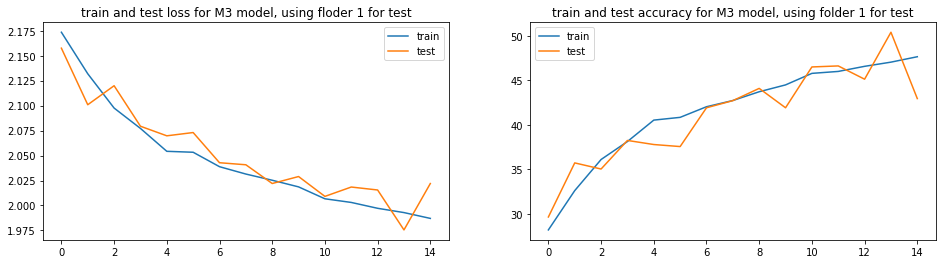

Epoch: 0
Train Accuracy: 26.91%
Test Accuracy: 25.563063056619317
Epoch: 1
Train Accuracy: 33.44%
Test Accuracy: 30.292792818567776
Epoch: 2
Train Accuracy: 36.38%
Test Accuracy: 32.88288289147454
Epoch: 3
Train Accuracy: 36.91%
Test Accuracy: 28.716216224807877
Epoch: 4
Train Accuracy: 38.99%
Test Accuracy: 35.022522531114184
Epoch: 5
Train Accuracy: 39.09%
Test Accuracy: 34.459459468051115
Epoch: 6
Train Accuracy: 39.61%
Test Accuracy: 37.27477478336643
Epoch: 7
Train Accuracy: 40.04%
Test Accuracy: 34.57207202052211
Epoch: 8
Train Accuracy: 40.99%
Test Accuracy: 36.59909908621161
Epoch: 9
Train Accuracy: 41.92%
Test Accuracy: 36.036036001669395
Epoch: 10
Train Accuracy: 42.06%
Test Accuracy: 37.83783782495035
Epoch: 11
Train Accuracy: 42.47%
Test Accuracy: 37.61261259972512
Epoch: 12
Train Accuracy: 43.17%
Test Accuracy: 38.28828831406327
Epoch: 13
Train Accuracy: 43.68%
Test Accuracy: 37.61261262120427
Epoch: 14
Train Accuracy: 43.17%
Test Accuracy: 35.36036034747287
The mean accur

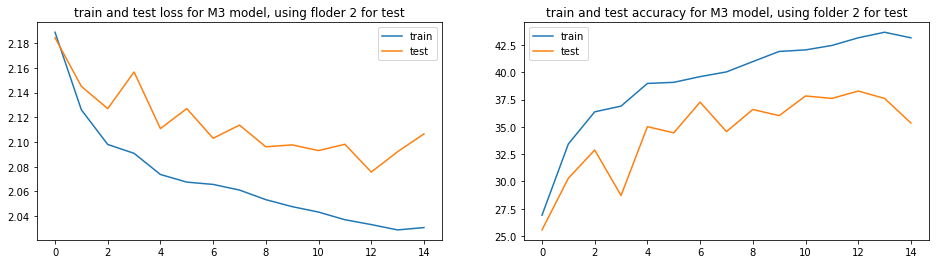

Epoch: 0
Train Accuracy: 30.25%
Test Accuracy: 33.189189189189186
Epoch: 1
Train Accuracy: 36.74%
Test Accuracy: 33.08108108108108
Epoch: 2
Train Accuracy: 37.71%
Test Accuracy: 27.027027027027028
Epoch: 3
Train Accuracy: 39.45%
Test Accuracy: 34.27027027027027
Epoch: 4
Train Accuracy: 40.22%
Test Accuracy: 36.648648648648646
Epoch: 5
Train Accuracy: 40.21%
Test Accuracy: 34.37837837837838
Epoch: 6
Train Accuracy: 41.51%
Test Accuracy: 33.08108108108108
Epoch: 7
Train Accuracy: 41.87%
Test Accuracy: 36.21621621621622
Epoch: 8
Train Accuracy: 43.14%
Test Accuracy: 32.86486486486486
Epoch: 9
Train Accuracy: 43.05%
Test Accuracy: 36.648648648648646
Epoch: 10
Train Accuracy: 43.69%
Test Accuracy: 37.513513513513516
Epoch: 11
Train Accuracy: 43.99%
Test Accuracy: 35.67567567567568
Epoch: 12
Train Accuracy: 43.87%
Test Accuracy: 36.648648648648646
Epoch: 13
Train Accuracy: 45.04%
Test Accuracy: 40.86486486486486
Epoch: 14
Train Accuracy: 45.14%
Test Accuracy: 39.13513513513514
The mean accur

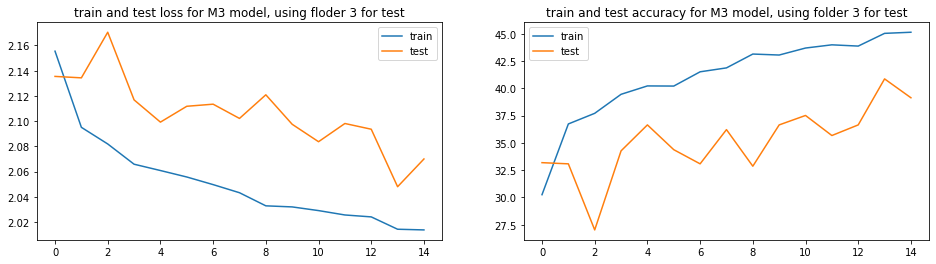

Epoch: 0
Train Accuracy: 32.15%
Test Accuracy: 30.707070707070706
Epoch: 1
Train Accuracy: 37.78%
Test Accuracy: 28.78787878787879
Epoch: 2
Train Accuracy: 40.44%
Test Accuracy: 31.11111111111111
Epoch: 3
Train Accuracy: 41.50%
Test Accuracy: 38.58585858585858
Epoch: 4
Train Accuracy: 41.57%
Test Accuracy: 40.505050505050505
Epoch: 5
Train Accuracy: 42.92%
Test Accuracy: 40.0
Epoch: 6
Train Accuracy: 43.15%
Test Accuracy: 35.858585858585855
Epoch: 7
Train Accuracy: 43.65%
Test Accuracy: 37.07070707070707
Epoch: 8
Train Accuracy: 43.89%
Test Accuracy: 41.61616161616162
Epoch: 9
Train Accuracy: 44.89%
Test Accuracy: 36.36363636363637
Epoch: 10
Train Accuracy: 45.14%
Test Accuracy: 40.303030303030305
Epoch: 11
Train Accuracy: 45.39%
Test Accuracy: 39.5959595959596
Epoch: 12
Train Accuracy: 46.40%
Test Accuracy: 38.484848484848484
Epoch: 13
Train Accuracy: 46.68%
Test Accuracy: 39.494949494949495
Epoch: 14
Train Accuracy: 46.68%
Test Accuracy: 42.12121212121212
The mean accuracy for the va

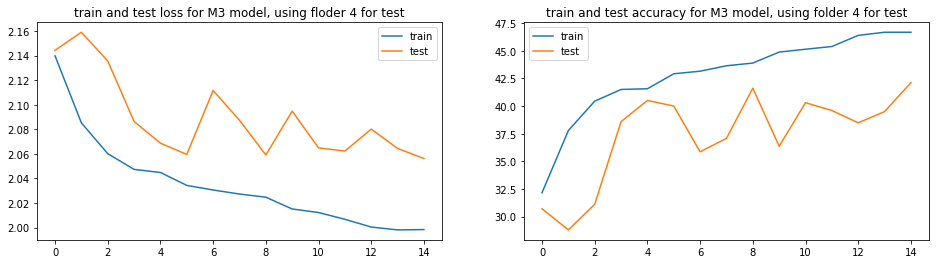

Epoch: 0
Train Accuracy: 28.60%
Test Accuracy: 25.32051275530432
Epoch: 1
Train Accuracy: 35.35%
Test Accuracy: 28.418803288386425
Epoch: 2
Train Accuracy: 40.21%
Test Accuracy: 31.83760682130471
Epoch: 3
Train Accuracy: 42.33%
Test Accuracy: 38.034188001583786
Epoch: 4
Train Accuracy: 43.25%
Test Accuracy: 40.38461528680264
Epoch: 5
Train Accuracy: 43.34%
Test Accuracy: 27.24358970283443
Epoch: 6
Train Accuracy: 44.54%
Test Accuracy: 39.63675200633514
Epoch: 7
Train Accuracy: 45.46%
Test Accuracy: 34.61538448496761
Epoch: 8
Train Accuracy: 46.10%
Test Accuracy: 39.20940164419321
Epoch: 9
Train Accuracy: 45.93%
Test Accuracy: 41.132478567270134
Epoch: 10
Train Accuracy: 47.40%
Test Accuracy: 37.17948716318505
Epoch: 11
Train Accuracy: 47.51%
Test Accuracy: 39.95726485945221
Epoch: 12
Train Accuracy: 47.60%
Test Accuracy: 38.35470083839873
Epoch: 13
Train Accuracy: 49.00%
Test Accuracy: 43.16239309718466
Epoch: 14
Train Accuracy: 49.42%
Test Accuracy: 40.27777771256928
The mean accuracy

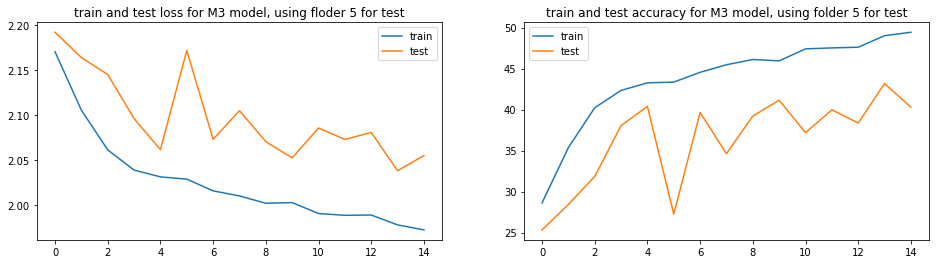

Epoch: 0
Train Accuracy: 28.68%
Test Accuracy: 18.71202915465122
Epoch: 1
Train Accuracy: 33.06%
Test Accuracy: 20.899149443949703
Epoch: 2
Train Accuracy: 33.75%
Test Accuracy: 23.572296467035972
Epoch: 3
Train Accuracy: 37.26%
Test Accuracy: 22.114216265672614
Epoch: 4
Train Accuracy: 37.03%
Test Accuracy: 23.207776418433298
Epoch: 5
Train Accuracy: 37.84%
Test Accuracy: 26.002430119752013
Epoch: 6
Train Accuracy: 39.20%
Test Accuracy: 21.749696226340163
Epoch: 7
Train Accuracy: 40.30%
Test Accuracy: 23.329283108253524
Epoch: 8
Train Accuracy: 39.95%
Test Accuracy: 27.339003571038695
Epoch: 9
Train Accuracy: 40.30%
Test Accuracy: 25.63791007810201
Epoch: 10
Train Accuracy: 41.04%
Test Accuracy: 27.825030365082938
Epoch: 11
Train Accuracy: 41.11%
Test Accuracy: 32.44228430941502
Epoch: 12
Train Accuracy: 41.57%
Test Accuracy: 28.554070459970728
Epoch: 13
Train Accuracy: 42.14%
Test Accuracy: 32.19927094599746
Epoch: 14
Train Accuracy: 42.27%
Test Accuracy: 27.94653705026805
The mean a

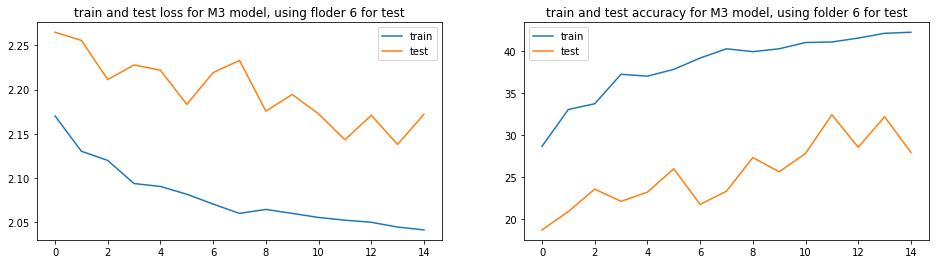

Epoch: 0
Train Accuracy: 29.36%
Test Accuracy: 26.252983302660375
Epoch: 1
Train Accuracy: 32.47%
Test Accuracy: 23.38902144784859
Epoch: 2
Train Accuracy: 34.66%
Test Accuracy: 30.78758949197847
Epoch: 3
Train Accuracy: 35.67%
Test Accuracy: 36.27684956006617
Epoch: 4
Train Accuracy: 36.95%
Test Accuracy: 38.90214788942178
Epoch: 5
Train Accuracy: 37.02%
Test Accuracy: 37.23150360726514
Epoch: 6
Train Accuracy: 38.84%
Test Accuracy: 33.293556031293114
Epoch: 7
Train Accuracy: 39.69%
Test Accuracy: 35.441527391674974
Epoch: 8
Train Accuracy: 40.35%
Test Accuracy: 39.37947490391697
Epoch: 9
Train Accuracy: 41.26%
Test Accuracy: 37.94749406072576
Epoch: 10
Train Accuracy: 41.53%
Test Accuracy: 38.0668258029692
Epoch: 11
Train Accuracy: 41.47%
Test Accuracy: 43.317422352428935
Epoch: 12
Train Accuracy: 42.42%
Test Accuracy: 37.112171824052396
Epoch: 13
Train Accuracy: 42.75%
Test Accuracy: 39.379474967647
Epoch: 14
Train Accuracy: 43.29%
Test Accuracy: 39.85680193662075
The mean accuracy 

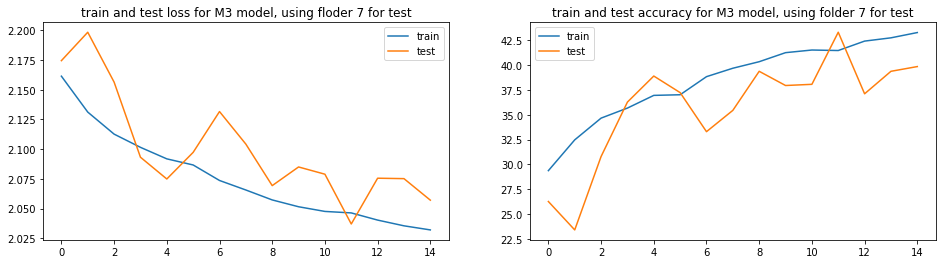

Epoch: 0
Train Accuracy: 27.79%
Test Accuracy: 31.389578159038837
Epoch: 1
Train Accuracy: 34.99%
Test Accuracy: 34.73945408482705
Epoch: 2
Train Accuracy: 35.93%
Test Accuracy: 26.426798997978416
Epoch: 3
Train Accuracy: 38.03%
Test Accuracy: 33.62282877465336
Epoch: 4
Train Accuracy: 38.23%
Test Accuracy: 33.99503721137793
Epoch: 5
Train Accuracy: 39.23%
Test Accuracy: 38.585607930980906
Epoch: 6
Train Accuracy: 40.75%
Test Accuracy: 38.585607930980906
Epoch: 7
Train Accuracy: 40.83%
Test Accuracy: 39.20595532552185
Epoch: 8
Train Accuracy: 40.94%
Test Accuracy: 38.585607930980906
Epoch: 9
Train Accuracy: 41.02%
Test Accuracy: 37.34491314189901
Epoch: 10
Train Accuracy: 42.09%
Test Accuracy: 39.7022332411546
Epoch: 11
Train Accuracy: 42.80%
Test Accuracy: 39.95037219897098
Epoch: 12
Train Accuracy: 42.91%
Test Accuracy: 42.18362281931837
Epoch: 13
Train Accuracy: 44.46%
Test Accuracy: 37.34491314663189
Epoch: 14
Train Accuracy: 44.63%
Test Accuracy: 40.074441677879165
The mean accura

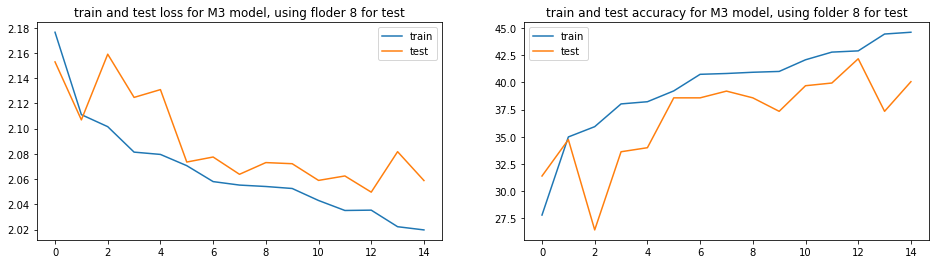

Epoch: 0
Train Accuracy: 28.78%
Test Accuracy: 27.328431372549016
Epoch: 1
Train Accuracy: 36.08%
Test Accuracy: 33.700980392156865
Epoch: 2
Train Accuracy: 40.03%
Test Accuracy: 40.80882352941176
Epoch: 3
Train Accuracy: 41.81%
Test Accuracy: 34.43627450980392
Epoch: 4
Train Accuracy: 43.25%
Test Accuracy: 36.27450980392157
Epoch: 5
Train Accuracy: 43.61%
Test Accuracy: 38.72549019607843
Epoch: 6
Train Accuracy: 44.28%
Test Accuracy: 43.872549019607845
Epoch: 7
Train Accuracy: 45.91%
Test Accuracy: 39.09313725490196
Epoch: 8
Train Accuracy: 45.54%
Test Accuracy: 43.13725490196079
Epoch: 9
Train Accuracy: 46.66%
Test Accuracy: 45.09803921568628
Epoch: 10
Train Accuracy: 46.84%
Test Accuracy: 42.8921568627451
Epoch: 11
Train Accuracy: 47.83%
Test Accuracy: 46.32352941176471
Epoch: 12
Train Accuracy: 48.12%
Test Accuracy: 42.8921568627451
Epoch: 13
Train Accuracy: 48.27%
Test Accuracy: 44.48529411764706
Epoch: 14
Train Accuracy: 49.29%
Test Accuracy: 45.955882352941174
The mean accuracy 

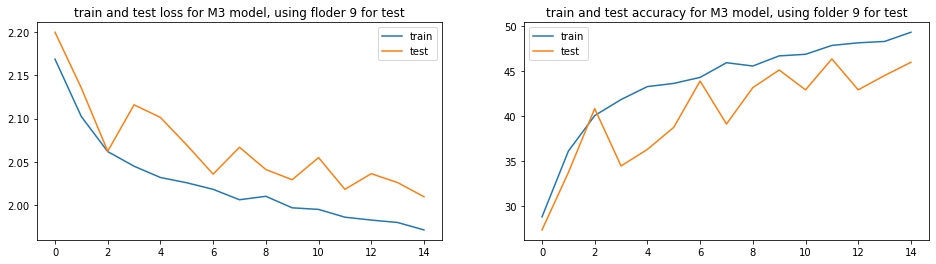

Epoch: 0
Train Accuracy: 31.75%
Test Accuracy: 34.40860215509522
Epoch: 1
Train Accuracy: 38.16%
Test Accuracy: 38.70967751050651
Epoch: 2
Train Accuracy: 39.32%
Test Accuracy: 32.25806448878353
Epoch: 3
Train Accuracy: 39.89%
Test Accuracy: 37.395459966989975
Epoch: 4
Train Accuracy: 42.27%
Test Accuracy: 34.289127878533186
Epoch: 5
Train Accuracy: 42.52%
Test Accuracy: 35.483870958626774
Epoch: 6
Train Accuracy: 43.42%
Test Accuracy: 36.081242505509934
Epoch: 7
Train Accuracy: 43.72%
Test Accuracy: 37.63440862493845
Epoch: 8
Train Accuracy: 44.29%
Test Accuracy: 40.86021516314544
Epoch: 9
Train Accuracy: 45.10%
Test Accuracy: 40.14336916651208
Epoch: 10
Train Accuracy: 46.17%
Test Accuracy: 40.02389490362279
Epoch: 11
Train Accuracy: 46.97%
Test Accuracy: 43.966547319965976
Epoch: 12
Train Accuracy: 48.16%
Test Accuracy: 43.72759862555682
Epoch: 13
Train Accuracy: 48.22%
Test Accuracy: 46.95340512730314
Epoch: 14
Train Accuracy: 48.94%
Test Accuracy: 40.14336919841516
The mean accura

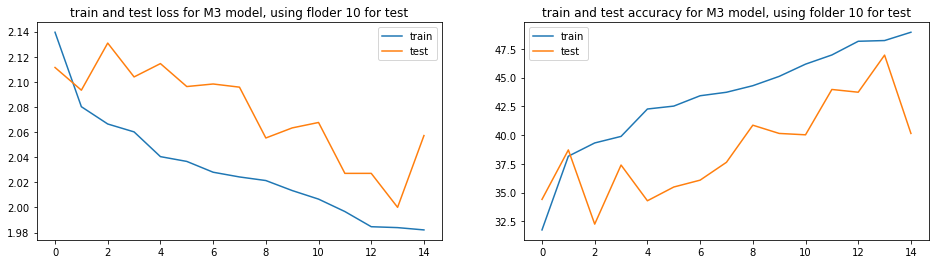

In [0]:
model_run_10(M3, 'M3')

# Train / Test M5
# Plot The Mean Accuracy
# Plot Train / Accuracy values

Epoch: 0
Train Accuracy: 26.09%
Test Accuracy: 23.482245122990385
Epoch: 1
Train Accuracy: 30.77%
Test Accuracy: 45.131729654703214
Epoch: 2
Train Accuracy: 35.36%
Test Accuracy: 38.83161511153563
Epoch: 3
Train Accuracy: 38.36%
Test Accuracy: 35.280641457469194
Epoch: 4
Train Accuracy: 41.02%
Test Accuracy: 36.082474209325554
Epoch: 5
Train Accuracy: 44.85%
Test Accuracy: 42.84077885333888
Epoch: 6
Train Accuracy: 47.95%
Test Accuracy: 54.295532628569546
Epoch: 7
Train Accuracy: 50.22%
Test Accuracy: 52.348224443258694
Epoch: 8
Train Accuracy: 52.87%
Test Accuracy: 50.973654051143825
Epoch: 9
Train Accuracy: 54.35%
Test Accuracy: 55.899198145391196
Epoch: 10
Train Accuracy: 57.34%
Test Accuracy: 62.77205037032889
Epoch: 11
Train Accuracy: 59.05%
Test Accuracy: 61.62657505485474
Epoch: 12
Train Accuracy: 60.24%
Test Accuracy: 65.17754870018189
Epoch: 13
Train Accuracy: 61.76%
Test Accuracy: 64.83390604043198
Epoch: 14
Train Accuracy: 62.57%
Test Accuracy: 64.49026347681419
The mean acc

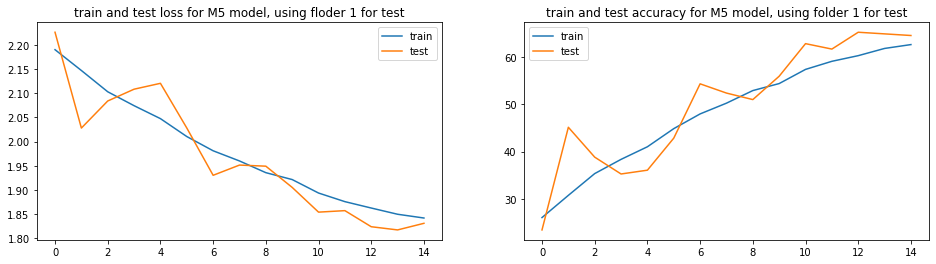

Epoch: 0
Train Accuracy: 30.98%
Test Accuracy: 33.783783753712974
Epoch: 1
Train Accuracy: 38.88%
Test Accuracy: 33.10810811669977
Epoch: 2
Train Accuracy: 43.93%
Test Accuracy: 33.55855852848775
Epoch: 3
Train Accuracy: 49.46%
Test Accuracy: 36.82432427277436
Epoch: 4
Train Accuracy: 52.09%
Test Accuracy: 37.61261259542929
Epoch: 5
Train Accuracy: 54.32%
Test Accuracy: 42.56756761052587
Epoch: 6
Train Accuracy: 56.77%
Test Accuracy: 42.0045045045045
Epoch: 7
Train Accuracy: 57.78%
Test Accuracy: 43.24324328620154
Epoch: 8
Train Accuracy: 58.71%
Test Accuracy: 43.80630628912298
Epoch: 9
Train Accuracy: 60.31%
Test Accuracy: 44.031531531531535
Epoch: 10
Train Accuracy: 60.85%
Test Accuracy: 50.0
Epoch: 11
Train Accuracy: 62.17%
Test Accuracy: 43.355855821489214
Epoch: 12
Train Accuracy: 62.00%
Test Accuracy: 44.707207207207205
Epoch: 13
Train Accuracy: 62.60%
Test Accuracy: 45.72072076367902
Epoch: 14
Train Accuracy: 63.58%
Test Accuracy: 45.83333327319171
The mean accuracy for the vali

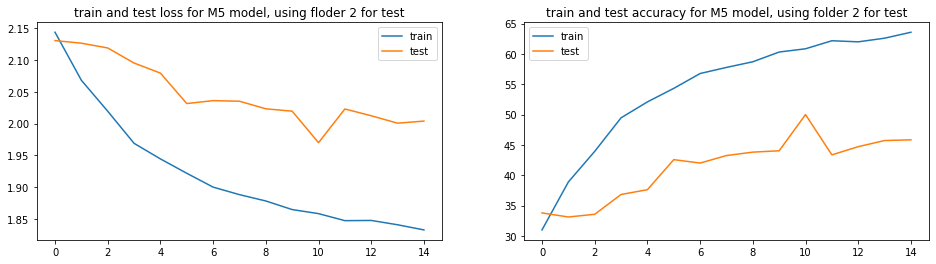

Epoch: 0
Train Accuracy: 33.32%
Test Accuracy: 24.864864864864867
Epoch: 1
Train Accuracy: 38.86%
Test Accuracy: 27.35135135135135
Epoch: 2
Train Accuracy: 40.95%
Test Accuracy: 26.594594594594597
Epoch: 3
Train Accuracy: 44.77%
Test Accuracy: 28.540540540540544
Epoch: 4
Train Accuracy: 48.42%
Test Accuracy: 33.513513513513516
Epoch: 5
Train Accuracy: 50.83%
Test Accuracy: 30.162162162162158
Epoch: 6
Train Accuracy: 52.35%
Test Accuracy: 33.83783783783784
Epoch: 7
Train Accuracy: 54.49%
Test Accuracy: 33.189189189189186
Epoch: 8
Train Accuracy: 55.28%
Test Accuracy: 34.27027027027027
Epoch: 9
Train Accuracy: 56.63%
Test Accuracy: 32.108108108108105
Epoch: 10
Train Accuracy: 57.05%
Test Accuracy: 32.21621621621622
Epoch: 11
Train Accuracy: 58.70%
Test Accuracy: 31.56756756756757
Epoch: 12
Train Accuracy: 59.54%
Test Accuracy: 31.675675675675674
Epoch: 13
Train Accuracy: 60.27%
Test Accuracy: 33.513513513513516
Epoch: 14
Train Accuracy: 60.60%
Test Accuracy: 35.45945945945946
The mean ac

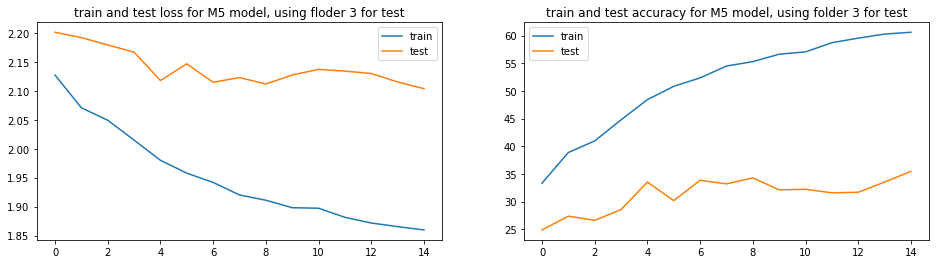

Epoch: 0
Train Accuracy: 31.50%
Test Accuracy: 25.050505050505052
Epoch: 1
Train Accuracy: 38.40%
Test Accuracy: 27.878787878787882
Epoch: 2
Train Accuracy: 41.32%
Test Accuracy: 34.34343434343434
Epoch: 3
Train Accuracy: 46.14%
Test Accuracy: 41.11111111111111
Epoch: 4
Train Accuracy: 49.78%
Test Accuracy: 43.43434343434344
Epoch: 5
Train Accuracy: 54.28%
Test Accuracy: 46.36363636363636
Epoch: 6
Train Accuracy: 55.62%
Test Accuracy: 53.83838383838384
Epoch: 7
Train Accuracy: 56.64%
Test Accuracy: 51.91919191919192
Epoch: 8
Train Accuracy: 57.63%
Test Accuracy: 49.7979797979798
Epoch: 9
Train Accuracy: 58.43%
Test Accuracy: 51.010101010101
Epoch: 10
Train Accuracy: 60.57%
Test Accuracy: 51.31313131313131
Epoch: 11
Train Accuracy: 61.16%
Test Accuracy: 53.73737373737374
Epoch: 12
Train Accuracy: 62.53%
Test Accuracy: 51.81818181818182
Epoch: 13
Train Accuracy: 62.81%
Test Accuracy: 52.62626262626262
Epoch: 14
Train Accuracy: 63.94%
Test Accuracy: 48.78787878787879
The mean accuracy for

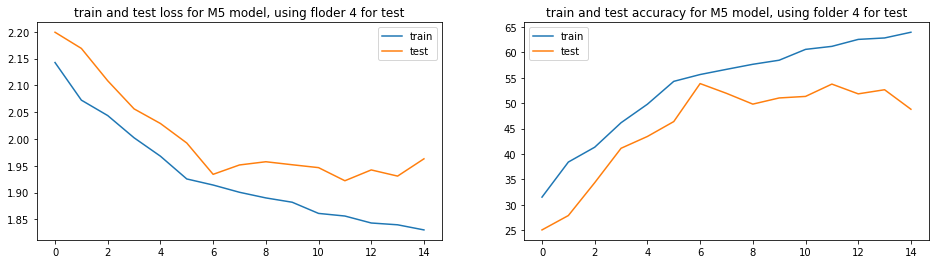

Epoch: 0
Train Accuracy: 34.65%
Test Accuracy: 38.78205121684278
Epoch: 1
Train Accuracy: 41.84%
Test Accuracy: 40.49145292624449
Epoch: 2
Train Accuracy: 44.96%
Test Accuracy: 42.52136745615902
Epoch: 3
Train Accuracy: 48.35%
Test Accuracy: 39.63675210414789
Epoch: 4
Train Accuracy: 52.39%
Test Accuracy: 50.42735031323555
Epoch: 5
Train Accuracy: 55.02%
Test Accuracy: 49.25213675213676
Epoch: 6
Train Accuracy: 56.90%
Test Accuracy: 56.730769149258606
Epoch: 7
Train Accuracy: 58.74%
Test Accuracy: 53.52564097673464
Epoch: 8
Train Accuracy: 59.22%
Test Accuracy: 55.876068327161995
Epoch: 9
Train Accuracy: 60.01%
Test Accuracy: 48.18376065115643
Epoch: 10
Train Accuracy: 61.76%
Test Accuracy: 57.05128200237567
Epoch: 11
Train Accuracy: 62.43%
Test Accuracy: 55.76923068772015
Epoch: 12
Train Accuracy: 63.47%
Test Accuracy: 55.662393080882545
Epoch: 13
Train Accuracy: 64.62%
Test Accuracy: 55.769230720324394
Epoch: 14
Train Accuracy: 65.21%
Test Accuracy: 57.47863231561122
The mean accurac

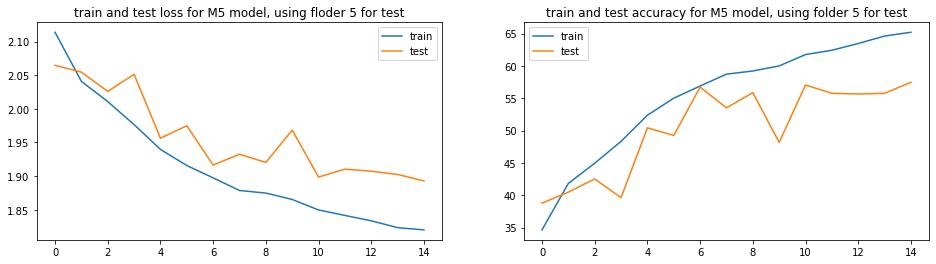

Epoch: 0
Train Accuracy: 28.17%
Test Accuracy: 27.703523677580264
Epoch: 1
Train Accuracy: 34.25%
Test Accuracy: 28.18955041600316
Epoch: 2
Train Accuracy: 38.65%
Test Accuracy: 26.60996353640736
Epoch: 3
Train Accuracy: 42.29%
Test Accuracy: 37.910085038455115
Epoch: 4
Train Accuracy: 46.07%
Test Accuracy: 39.12515186713069
Epoch: 5
Train Accuracy: 48.03%
Test Accuracy: 42.28432561936963
Epoch: 6
Train Accuracy: 51.40%
Test Accuracy: 43.74240581841544
Epoch: 7
Train Accuracy: 53.36%
Test Accuracy: 44.47144591562079
Epoch: 8
Train Accuracy: 56.08%
Test Accuracy: 52.73390028108803
Epoch: 9
Train Accuracy: 58.84%
Test Accuracy: 51.88335361225782
Epoch: 10
Train Accuracy: 60.55%
Test Accuracy: 52.12636686675024
Epoch: 11
Train Accuracy: 61.90%
Test Accuracy: 51.88335361225782
Epoch: 12
Train Accuracy: 62.83%
Test Accuracy: 51.640340190901355
Epoch: 13
Train Accuracy: 63.27%
Test Accuracy: 55.89307409126587
Epoch: 14
Train Accuracy: 63.85%
Test Accuracy: 51.76184687840403
The mean accuracy

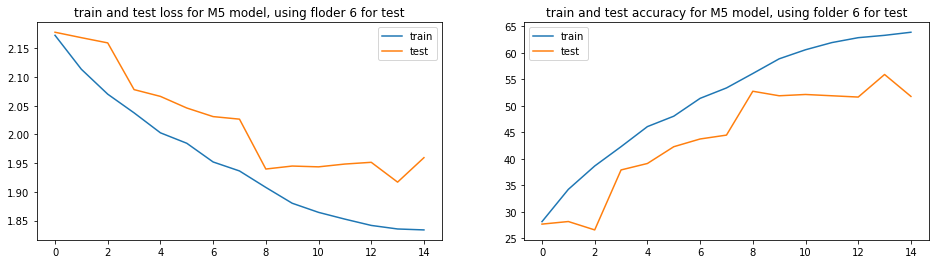

Epoch: 0
Train Accuracy: 28.15%
Test Accuracy: 32.69689736104524
Epoch: 1
Train Accuracy: 32.97%
Test Accuracy: 28.042959422655496
Epoch: 2
Train Accuracy: 38.36%
Test Accuracy: 30.42959421745064
Epoch: 3
Train Accuracy: 40.96%
Test Accuracy: 41.28878273429051
Epoch: 4
Train Accuracy: 43.48%
Test Accuracy: 35.44152741443571
Epoch: 5
Train Accuracy: 45.05%
Test Accuracy: 40.572792344559915
Epoch: 6
Train Accuracy: 47.94%
Test Accuracy: 37.94749395147428
Epoch: 7
Train Accuracy: 50.58%
Test Accuracy: 49.99999989074853
Epoch: 8
Train Accuracy: 52.17%
Test Accuracy: 39.498806668921134
Epoch: 9
Train Accuracy: 53.65%
Test Accuracy: 44.74940335039307
Epoch: 10
Train Accuracy: 53.95%
Test Accuracy: 47.2553699739224
Epoch: 11
Train Accuracy: 55.17%
Test Accuracy: 44.51073990232335
Epoch: 12
Train Accuracy: 55.78%
Test Accuracy: 50.357995117478836
Epoch: 13
Train Accuracy: 56.89%
Test Accuracy: 45.226730228323916
Epoch: 14
Train Accuracy: 57.33%
Test Accuracy: 46.658711153453744
The mean accura

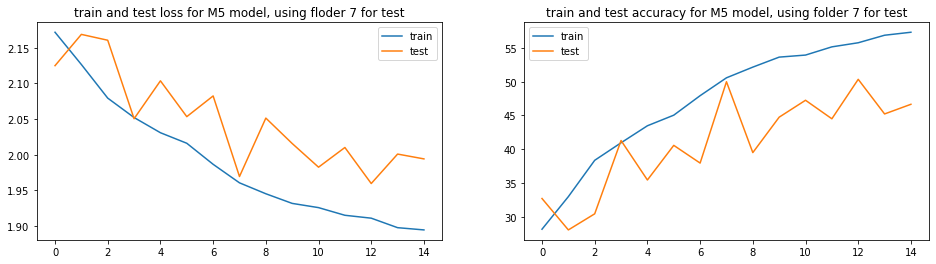

Epoch: 0
Train Accuracy: 33.76%
Test Accuracy: 37.965260536439956
Epoch: 1
Train Accuracy: 44.46%
Test Accuracy: 38.83374688879728
Epoch: 2
Train Accuracy: 47.22%
Test Accuracy: 31.38957815430596
Epoch: 3
Train Accuracy: 49.19%
Test Accuracy: 47.146401975645915
Epoch: 4
Train Accuracy: 52.33%
Test Accuracy: 43.92059552403301
Epoch: 5
Train Accuracy: 54.74%
Test Accuracy: 44.91315135529852
Epoch: 6
Train Accuracy: 56.22%
Test Accuracy: 37.965260536439956
Epoch: 7
Train Accuracy: 58.13%
Test Accuracy: 45.03722083420671
Epoch: 8
Train Accuracy: 58.57%
Test Accuracy: 43.79652604512482
Epoch: 9
Train Accuracy: 59.99%
Test Accuracy: 48.75930520145237
Epoch: 10
Train Accuracy: 60.12%
Test Accuracy: 45.40942927093127
Epoch: 11
Train Accuracy: 60.42%
Test Accuracy: 51.985111653065275
Epoch: 12
Train Accuracy: 61.77%
Test Accuracy: 45.03722083420671
Epoch: 13
Train Accuracy: 62.28%
Test Accuracy: 42.679900734951126
Epoch: 14
Train Accuracy: 63.25%
Test Accuracy: 46.65012406001316
The mean accura

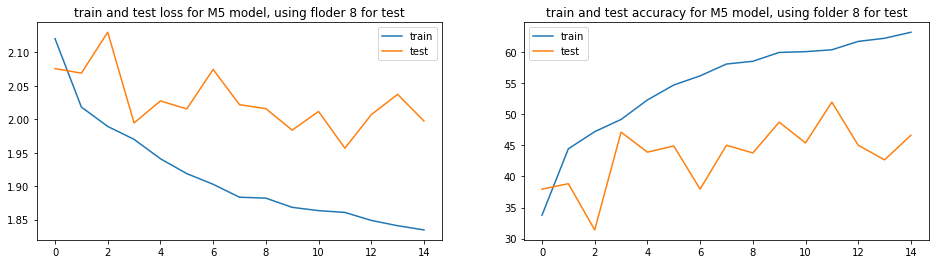

Epoch: 0
Train Accuracy: 33.53%
Test Accuracy: 37.254901960784316
Epoch: 1
Train Accuracy: 41.83%
Test Accuracy: 34.681372549019606
Epoch: 2
Train Accuracy: 48.17%
Test Accuracy: 41.42156862745098
Epoch: 3
Train Accuracy: 49.62%
Test Accuracy: 39.950980392156865
Epoch: 4
Train Accuracy: 52.12%
Test Accuracy: 47.794117647058826
Epoch: 5
Train Accuracy: 54.79%
Test Accuracy: 46.32352941176471
Epoch: 6
Train Accuracy: 58.05%
Test Accuracy: 50.61274509803921
Epoch: 7
Train Accuracy: 59.13%
Test Accuracy: 50.73529411764706
Epoch: 8
Train Accuracy: 60.26%
Test Accuracy: 55.63725490196079
Epoch: 9
Train Accuracy: 60.16%
Test Accuracy: 47.549019607843135
Epoch: 10
Train Accuracy: 60.71%
Test Accuracy: 52.818627450980394
Epoch: 11
Train Accuracy: 62.19%
Test Accuracy: 53.06372549019608
Epoch: 12
Train Accuracy: 62.94%
Test Accuracy: 54.04411764705882
Epoch: 13
Train Accuracy: 63.85%
Test Accuracy: 54.166666666666664
Epoch: 14
Train Accuracy: 65.25%
Test Accuracy: 54.41176470588235
The mean accu

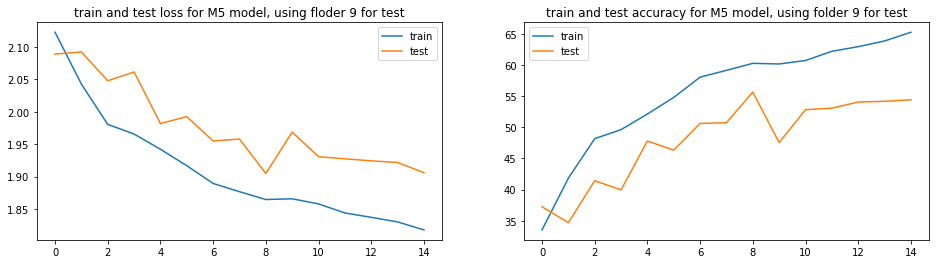

Epoch: 0
Train Accuracy: 29.01%
Test Accuracy: 17.682198313686868
Epoch: 1
Train Accuracy: 35.02%
Test Accuracy: 35.00597378857247
Epoch: 2
Train Accuracy: 39.56%
Test Accuracy: 28.076463599073985
Epoch: 3
Train Accuracy: 42.61%
Test Accuracy: 37.99283161413997
Epoch: 4
Train Accuracy: 48.08%
Test Accuracy: 41.33811227850874
Epoch: 5
Train Accuracy: 49.42%
Test Accuracy: 42.771804084914564
Epoch: 6
Train Accuracy: 51.23%
Test Accuracy: 44.08602152816426
Epoch: 7
Train Accuracy: 53.34%
Test Accuracy: 45.9976105547578
Epoch: 8
Train Accuracy: 53.82%
Test Accuracy: 47.550776642283225
Epoch: 9
Train Accuracy: 54.95%
Test Accuracy: 47.789725199964884
Epoch: 10
Train Accuracy: 55.69%
Test Accuracy: 51.493428972032326
Epoch: 11
Train Accuracy: 57.56%
Test Accuracy: 47.550776642283225
Epoch: 12
Train Accuracy: 57.31%
Test Accuracy: 54.599761060489115
Epoch: 13
Train Accuracy: 58.38%
Test Accuracy: 47.909199512987584
Epoch: 14
Train Accuracy: 58.62%
Test Accuracy: 54.71923549200899
The mean acc

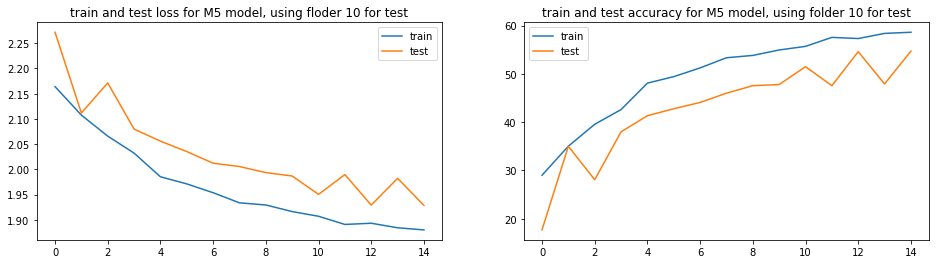

In [0]:
model_run_10(M5, 'M5')

# Train / Test M11
# Plot The Mean Accuracy
# Plot Train / Accuracy values

Epoch: 0
Train Accuracy: 23.77%
Test Accuracy: 9.049255438823197
Epoch: 1
Train Accuracy: 21.94%
Test Accuracy: 26.116838474863584
Epoch: 2
Train Accuracy: 28.06%
Test Accuracy: 25.31500572300722
Epoch: 3
Train Accuracy: 30.43%
Test Accuracy: 28.636884298248116
Epoch: 4
Train Accuracy: 32.30%
Test Accuracy: 24.05498280694531
Epoch: 5
Train Accuracy: 34.86%
Test Accuracy: 23.482245125175204
Epoch: 6
Train Accuracy: 37.25%
Test Accuracy: 38.37342495606937
Epoch: 7
Train Accuracy: 38.89%
Test Accuracy: 34.3642611596456
Epoch: 8
Train Accuracy: 40.62%
Test Accuracy: 30.46964489389531
Epoch: 9
Train Accuracy: 43.50%
Test Accuracy: 32.646048101226356
Epoch: 10
Train Accuracy: 45.32%
Test Accuracy: 46.16265743294942
Epoch: 11
Train Accuracy: 47.41%
Test Accuracy: 42.726231370731455
Epoch: 12
Train Accuracy: 48.34%
Test Accuracy: 47.53722787968482
Epoch: 13
Train Accuracy: 51.07%
Test Accuracy: 43.29896905687121
Epoch: 14
Train Accuracy: 51.98%
Test Accuracy: 47.88087054380436
The mean accurac

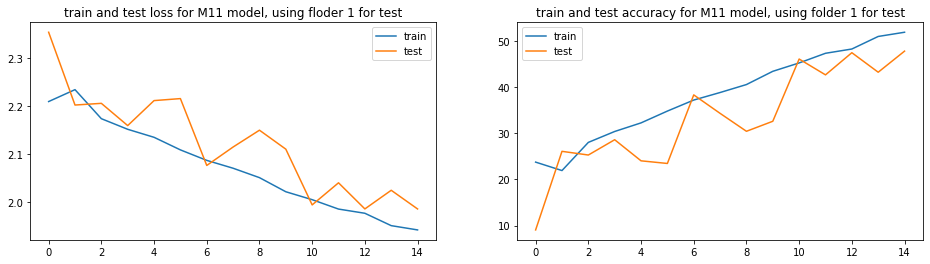

Epoch: 0
Train Accuracy: 24.11%
Test Accuracy: 27.027027014139538
Epoch: 1
Train Accuracy: 30.88%
Test Accuracy: 40.09009009868175
Epoch: 2
Train Accuracy: 35.03%
Test Accuracy: 32.54504507082003
Epoch: 3
Train Accuracy: 37.37%
Test Accuracy: 29.72972971684224
Epoch: 4
Train Accuracy: 39.16%
Test Accuracy: 36.82432428995768
Epoch: 5
Train Accuracy: 39.48%
Test Accuracy: 34.45945940790949
Epoch: 6
Train Accuracy: 42.04%
Test Accuracy: 35.2477477563394
Epoch: 7
Train Accuracy: 42.17%
Test Accuracy: 44.25675667943181
Epoch: 8
Train Accuracy: 44.54%
Test Accuracy: 39.864864873456526
Epoch: 9
Train Accuracy: 44.85%
Test Accuracy: 41.891891831750264
Epoch: 10
Train Accuracy: 48.39%
Test Accuracy: 43.58108102093946
Epoch: 11
Train Accuracy: 52.51%
Test Accuracy: 49.324324307141
Epoch: 12
Train Accuracy: 54.65%
Test Accuracy: 39.63963962245632
Epoch: 13
Train Accuracy: 56.07%
Test Accuracy: 47.972972912831345
Epoch: 14
Train Accuracy: 56.37%
Test Accuracy: 51.12612604020952
The mean accuracy f

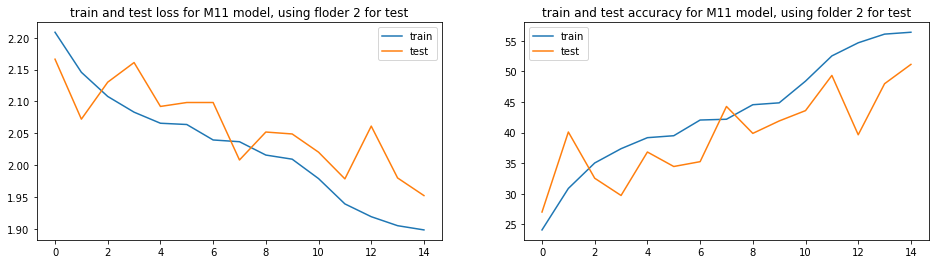

Epoch: 0
Train Accuracy: 24.12%
Test Accuracy: 21.08108108108108
Epoch: 1
Train Accuracy: 30.11%
Test Accuracy: 21.62162162162162
Epoch: 2
Train Accuracy: 35.01%
Test Accuracy: 31.45945945945946
Epoch: 3
Train Accuracy: 39.34%
Test Accuracy: 30.486486486486484
Epoch: 4
Train Accuracy: 40.87%
Test Accuracy: 28.43243243243243
Epoch: 5
Train Accuracy: 42.42%
Test Accuracy: 22.486486486486488
Epoch: 6
Train Accuracy: 45.09%
Test Accuracy: 23.783783783783786
Epoch: 7
Train Accuracy: 47.69%
Test Accuracy: 37.2972972972973
Epoch: 8
Train Accuracy: 49.08%
Test Accuracy: 33.2972972972973
Epoch: 9
Train Accuracy: 50.01%
Test Accuracy: 34.486486486486484
Epoch: 10
Train Accuracy: 50.86%
Test Accuracy: 32.32432432432432
Epoch: 11
Train Accuracy: 51.43%
Test Accuracy: 32.54054054054054
Epoch: 12
Train Accuracy: 53.98%
Test Accuracy: 39.89189189189189
Epoch: 13
Train Accuracy: 54.54%
Test Accuracy: 36.0
Epoch: 14
Train Accuracy: 56.05%
Test Accuracy: 35.78378378378378
The mean accuracy for the valid

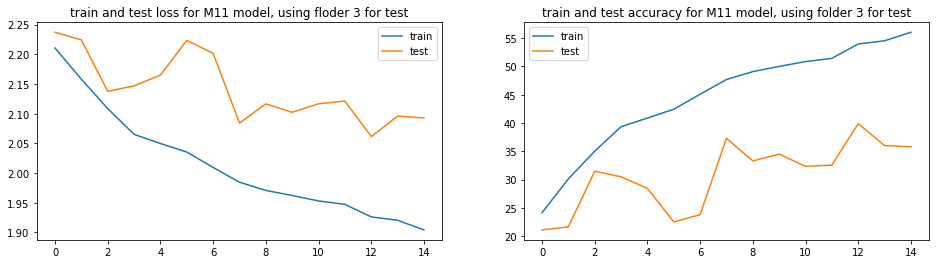

Epoch: 0
Train Accuracy: 25.01%
Test Accuracy: 18.282828282828284
Epoch: 1
Train Accuracy: 29.94%
Test Accuracy: 20.2020202020202
Epoch: 2
Train Accuracy: 36.11%
Test Accuracy: 27.67676767676768
Epoch: 3
Train Accuracy: 40.14%
Test Accuracy: 29.5959595959596
Epoch: 4
Train Accuracy: 41.02%
Test Accuracy: 29.5959595959596
Epoch: 5
Train Accuracy: 44.48%
Test Accuracy: 31.01010101010101
Epoch: 6
Train Accuracy: 45.65%
Test Accuracy: 30.808080808080806
Epoch: 7
Train Accuracy: 47.07%
Test Accuracy: 31.414141414141415
Epoch: 8
Train Accuracy: 48.73%
Test Accuracy: 35.45454545454545
Epoch: 9
Train Accuracy: 50.17%
Test Accuracy: 39.696969696969695
Epoch: 10
Train Accuracy: 51.15%
Test Accuracy: 41.21212121212121
Epoch: 11
Train Accuracy: 53.40%
Test Accuracy: 40.1010101010101
Epoch: 12
Train Accuracy: 56.23%
Test Accuracy: 46.36363636363636
Epoch: 13
Train Accuracy: 58.23%
Test Accuracy: 47.97979797979798
Epoch: 14
Train Accuracy: 59.27%
Test Accuracy: 50.303030303030305
The mean accuracy f

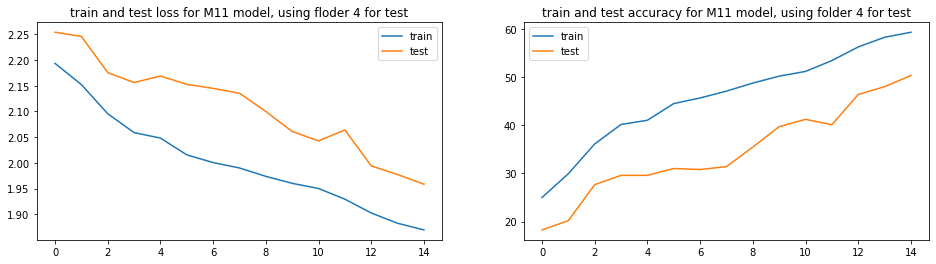

Epoch: 0
Train Accuracy: 28.16%
Test Accuracy: 30.23504260462574
Epoch: 1
Train Accuracy: 35.25%
Test Accuracy: 21.474358909150475
Epoch: 2
Train Accuracy: 38.10%
Test Accuracy: 36.75213662171976
Epoch: 3
Train Accuracy: 43.15%
Test Accuracy: 34.29487177856967
Epoch: 4
Train Accuracy: 46.55%
Test Accuracy: 40.59829050047785
Epoch: 5
Train Accuracy: 49.18%
Test Accuracy: 47.32905982905983
Epoch: 6
Train Accuracy: 51.05%
Test Accuracy: 42.84188030927609
Epoch: 7
Train Accuracy: 53.73%
Test Accuracy: 49.67948717948718
Epoch: 8
Train Accuracy: 55.72%
Test Accuracy: 44.23076913295648
Epoch: 9
Train Accuracy: 56.20%
Test Accuracy: 33.11965803814749
Epoch: 10
Train Accuracy: 57.71%
Test Accuracy: 48.3974358322274
Epoch: 11
Train Accuracy: 59.38%
Test Accuracy: 41.239316108899246
Epoch: 12
Train Accuracy: 59.12%
Test Accuracy: 45.40598287337866
Epoch: 13
Train Accuracy: 60.86%
Test Accuracy: 44.44444431402745
Epoch: 14
Train Accuracy: 61.08%
Test Accuracy: 44.764957199748764
The mean accuracy 

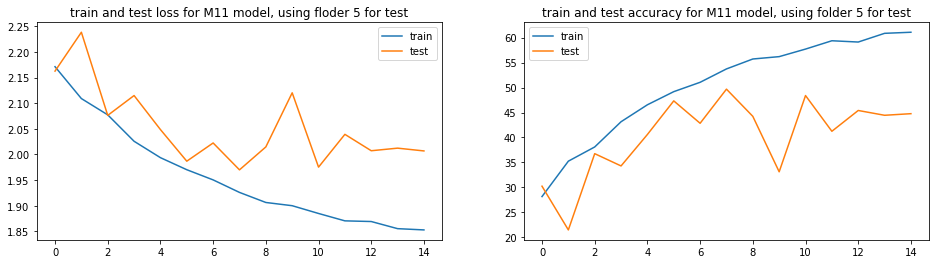

Epoch: 0
Train Accuracy: 28.37%
Test Accuracy: 20.777642765717257
Epoch: 1
Train Accuracy: 31.89%
Test Accuracy: 21.99270958975772
Epoch: 2
Train Accuracy: 34.53%
Test Accuracy: 32.320777624229905
Epoch: 3
Train Accuracy: 40.40%
Test Accuracy: 24.544349925341322
Epoch: 4
Train Accuracy: 41.79%
Test Accuracy: 34.75091128853373
Epoch: 5
Train Accuracy: 42.90%
Test Accuracy: 34.75091128853373
Epoch: 6
Train Accuracy: 46.23%
Test Accuracy: 40.826245427276504
Epoch: 7
Train Accuracy: 47.93%
Test Accuracy: 35.358444698236404
Epoch: 8
Train Accuracy: 50.23%
Test Accuracy: 39.85419196433604
Epoch: 9
Train Accuracy: 50.84%
Test Accuracy: 48.602673128482635
Epoch: 10
Train Accuracy: 51.92%
Test Accuracy: 45.56500605679369
Epoch: 11
Train Accuracy: 53.21%
Test Accuracy: 43.742405816097886
Epoch: 12
Train Accuracy: 54.10%
Test Accuracy: 50.425273376131116
Epoch: 13
Train Accuracy: 54.60%
Test Accuracy: 47.38760630444217
Epoch: 14
Train Accuracy: 56.81%
Test Accuracy: 44.47144591330323
The mean acc

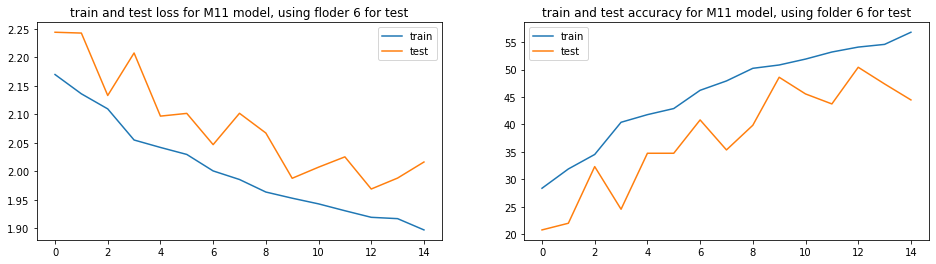

Epoch: 0
Train Accuracy: 25.91%
Test Accuracy: 27.326968891808413
Epoch: 1
Train Accuracy: 33.03%
Test Accuracy: 31.264916454124
Epoch: 2
Train Accuracy: 36.28%
Test Accuracy: 28.400954653937948
Epoch: 3
Train Accuracy: 41.16%
Test Accuracy: 30.906921286571563
Epoch: 4
Train Accuracy: 43.91%
Test Accuracy: 36.75417659276994
Epoch: 5
Train Accuracy: 45.96%
Test Accuracy: 39.26014319809069
Epoch: 6
Train Accuracy: 46.95%
Test Accuracy: 37.112171883230275
Epoch: 7
Train Accuracy: 47.23%
Test Accuracy: 41.52744632802886
Epoch: 8
Train Accuracy: 50.06%
Test Accuracy: 46.897374719879224
Epoch: 9
Train Accuracy: 52.06%
Test Accuracy: 45.82338906700116
Epoch: 10
Train Accuracy: 53.53%
Test Accuracy: 53.10262531653793
Epoch: 11
Train Accuracy: 54.69%
Test Accuracy: 52.14797137859044
Epoch: 12
Train Accuracy: 55.95%
Test Accuracy: 44.63007151710674
Epoch: 13
Train Accuracy: 56.93%
Test Accuracy: 44.39140806903703
Epoch: 14
Train Accuracy: 57.16%
Test Accuracy: 53.10262531653793
The mean accuracy

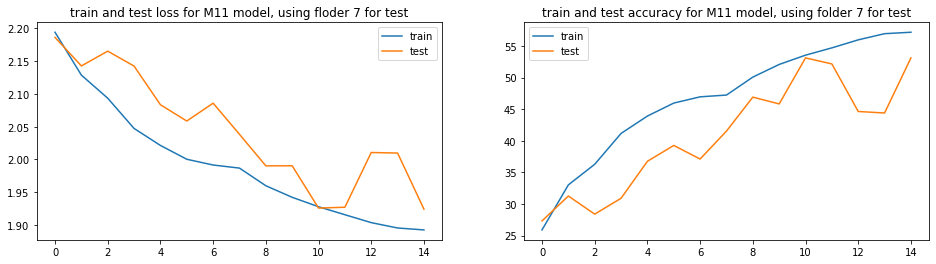

Epoch: 0
Train Accuracy: 28.53%
Test Accuracy: 32.38213399503722
Epoch: 1
Train Accuracy: 33.72%
Test Accuracy: 23.32506203000658
Epoch: 2
Train Accuracy: 36.32%
Test Accuracy: 32.38213399503722
Epoch: 3
Train Accuracy: 42.54%
Test Accuracy: 41.06699751861042
Epoch: 4
Train Accuracy: 47.46%
Test Accuracy: 41.687344913151364
Epoch: 5
Train Accuracy: 49.60%
Test Accuracy: 49.007444168734494
Epoch: 6
Train Accuracy: 51.53%
Test Accuracy: 45.40942928039702
Epoch: 7
Train Accuracy: 52.50%
Test Accuracy: 48.51116625310174
Epoch: 8
Train Accuracy: 54.69%
Test Accuracy: 48.13895781637717
Epoch: 9
Train Accuracy: 54.58%
Test Accuracy: 49.007444168734494
Epoch: 10
Train Accuracy: 56.94%
Test Accuracy: 40.57071960297767
Epoch: 11
Train Accuracy: 57.73%
Test Accuracy: 42.92803970223325
Epoch: 12
Train Accuracy: 58.79%
Test Accuracy: 50.124069441045194
Epoch: 13
Train Accuracy: 59.61%
Test Accuracy: 55.459057034097306
Epoch: 14
Train Accuracy: 61.23%
Test Accuracy: 50.124069441045194
The mean accur

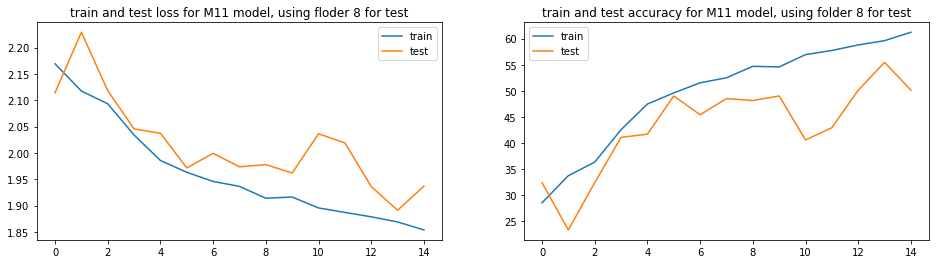

Epoch: 0
Train Accuracy: 26.58%
Test Accuracy: 23.52941176470588
Epoch: 1
Train Accuracy: 31.78%
Test Accuracy: 23.284313725490197
Epoch: 2
Train Accuracy: 36.61%
Test Accuracy: 29.166666666666668
Epoch: 3
Train Accuracy: 40.26%
Test Accuracy: 44.97549019607843
Epoch: 4
Train Accuracy: 42.58%
Test Accuracy: 36.39705882352941
Epoch: 5
Train Accuracy: 43.56%
Test Accuracy: 34.80392156862745
Epoch: 6
Train Accuracy: 46.07%
Test Accuracy: 43.504901960784316
Epoch: 7
Train Accuracy: 48.26%
Test Accuracy: 47.181372549019606
Epoch: 8
Train Accuracy: 49.56%
Test Accuracy: 42.40196078431372
Epoch: 9
Train Accuracy: 50.18%
Test Accuracy: 45.220588235294116
Epoch: 10
Train Accuracy: 52.35%
Test Accuracy: 53.06372549019608
Epoch: 11
Train Accuracy: 53.75%
Test Accuracy: 54.41176470588235
Epoch: 12
Train Accuracy: 54.81%
Test Accuracy: 53.18627450980392
Epoch: 13
Train Accuracy: 55.14%
Test Accuracy: 53.18627450980392
Epoch: 14
Train Accuracy: 55.75%
Test Accuracy: 50.98039215686274
The mean accura

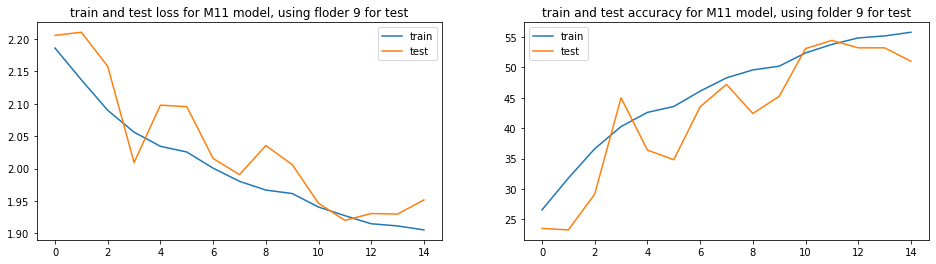

Epoch: 0
Train Accuracy: 26.38%
Test Accuracy: 11.947431312524575
Epoch: 1
Train Accuracy: 32.98%
Test Accuracy: 30.465949843576446
Epoch: 2
Train Accuracy: 37.42%
Test Accuracy: 30.704898501524937
Epoch: 3
Train Accuracy: 40.77%
Test Accuracy: 31.421744347758047
Epoch: 4
Train Accuracy: 43.89%
Test Accuracy: 42.29390690118751
Epoch: 5
Train Accuracy: 44.88%
Test Accuracy: 39.54599763330165
Epoch: 6
Train Accuracy: 47.35%
Test Accuracy: 41.577060904554145
Epoch: 7
Train Accuracy: 48.07%
Test Accuracy: 39.068100381210854
Epoch: 8
Train Accuracy: 48.71%
Test Accuracy: 41.09916365246334
Epoch: 9
Train Accuracy: 50.09%
Test Accuracy: 40.62126641860287
Epoch: 10
Train Accuracy: 51.23%
Test Accuracy: 43.84707292034919
Epoch: 11
Train Accuracy: 53.02%
Test Accuracy: 41.57706099114822
Epoch: 12
Train Accuracy: 53.22%
Test Accuracy: 45.63918768405345
Epoch: 13
Train Accuracy: 56.23%
Test Accuracy: 46.71445636453024
Epoch: 14
Train Accuracy: 57.99%
Test Accuracy: 50.65710879910377
The mean accur

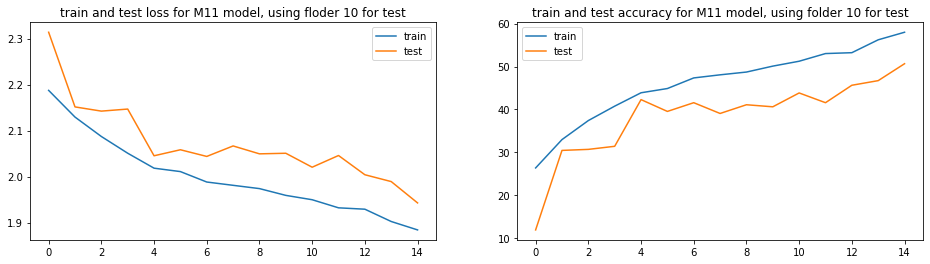

In [0]:
model_run_10(M11, 'M11')

# Train / Test M18
# Plot The Mean Accuracy
# Plot Train / Accuracy values

Epoch: 0
Train Accuracy: 18.03%
Test Accuracy: 11.454753716240496
Epoch: 1
Train Accuracy: 21.71%
Test Accuracy: 26.002290942005274
Epoch: 2
Train Accuracy: 19.38%
Test Accuracy: 19.3585337827842
Epoch: 3
Train Accuracy: 21.63%
Test Accuracy: 21.649484531712833
Epoch: 4
Train Accuracy: 22.63%
Test Accuracy: 25.773195865364556
Epoch: 5
Train Accuracy: 24.84%
Test Accuracy: 26.575028630329843
Epoch: 6
Train Accuracy: 28.33%
Test Accuracy: 21.878579603983912
Epoch: 7
Train Accuracy: 28.41%
Test Accuracy: 24.28407788140121
Epoch: 8
Train Accuracy: 26.80%
Test Accuracy: 23.482245125175204
Epoch: 9
Train Accuracy: 32.74%
Test Accuracy: 26.34593355368912
Epoch: 10
Train Accuracy: 35.00%
Test Accuracy: 23.940435274087005
Epoch: 11
Train Accuracy: 37.33%
Test Accuracy: 27.49140892596862
Epoch: 12
Train Accuracy: 37.76%
Test Accuracy: 34.13516607863524
Epoch: 13
Train Accuracy: 40.46%
Test Accuracy: 39.63344786776163
Epoch: 14
Train Accuracy: 41.91%
Test Accuracy: 41.92439861013581
The mean accu

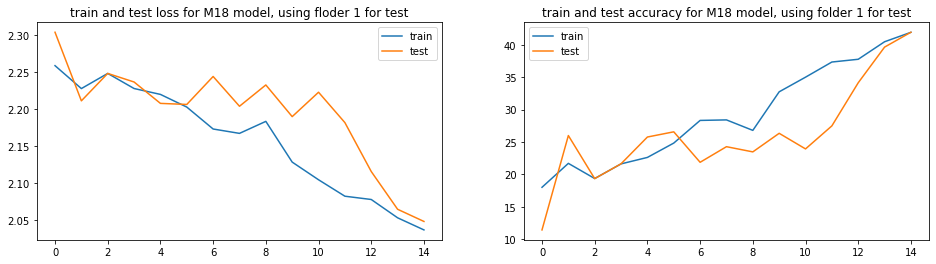

Epoch: 0
Train Accuracy: 20.51%
Test Accuracy: 12.162162157866332
Epoch: 1
Train Accuracy: 24.57%
Test Accuracy: 29.504504474433695
Epoch: 2
Train Accuracy: 25.59%
Test Accuracy: 32.094594586002934
Epoch: 3
Train Accuracy: 26.84%
Test Accuracy: 24.6621621535705
Epoch: 4
Train Accuracy: 26.98%
Test Accuracy: 24.549549545253722
Epoch: 5
Train Accuracy: 29.02%
Test Accuracy: 26.23873875162623
Epoch: 6
Train Accuracy: 29.13%
Test Accuracy: 26.351351325576367
Epoch: 7
Train Accuracy: 29.31%
Test Accuracy: 28.716216190441234
Epoch: 8
Train Accuracy: 30.38%
Test Accuracy: 22.972972968677144
Epoch: 9
Train Accuracy: 31.21%
Test Accuracy: 25.450450444006705
Epoch: 10
Train Accuracy: 30.67%
Test Accuracy: 21.1711711679493
Epoch: 11
Train Accuracy: 34.77%
Test Accuracy: 29.842342350934004
Epoch: 12
Train Accuracy: 38.59%
Test Accuracy: 31.418918927510575
Epoch: 13
Train Accuracy: 41.20%
Test Accuracy: 34.68468465461388
Epoch: 14
Train Accuracy: 42.75%
Test Accuracy: 36.14864867442363
The mean acc

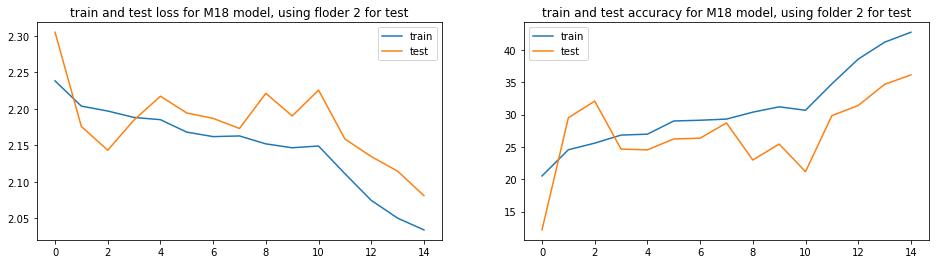

Epoch: 0
Train Accuracy: 22.34%
Test Accuracy: 19.56756756756757
Epoch: 1
Train Accuracy: 25.49%
Test Accuracy: 10.054054054054054
Epoch: 2
Train Accuracy: 25.59%
Test Accuracy: 16.324324324324323
Epoch: 3
Train Accuracy: 26.85%
Test Accuracy: 18.37837837837838
Epoch: 4
Train Accuracy: 31.74%
Test Accuracy: 17.72972972972973
Epoch: 5
Train Accuracy: 34.43%
Test Accuracy: 25.513513513513512
Epoch: 6
Train Accuracy: 36.45%
Test Accuracy: 28.216216216216218
Epoch: 7
Train Accuracy: 36.90%
Test Accuracy: 20.756756756756754
Epoch: 8
Train Accuracy: 38.84%
Test Accuracy: 19.783783783783786
Epoch: 9
Train Accuracy: 39.73%
Test Accuracy: 31.027027027027028
Epoch: 10
Train Accuracy: 40.22%
Test Accuracy: 27.135135135135137
Epoch: 11
Train Accuracy: 41.82%
Test Accuracy: 29.513513513513512
Epoch: 12
Train Accuracy: 43.23%
Test Accuracy: 26.918918918918923
Epoch: 13
Train Accuracy: 43.27%
Test Accuracy: 24.43243243243243
Epoch: 14
Train Accuracy: 43.65%
Test Accuracy: 31.675675675675674
The mean 

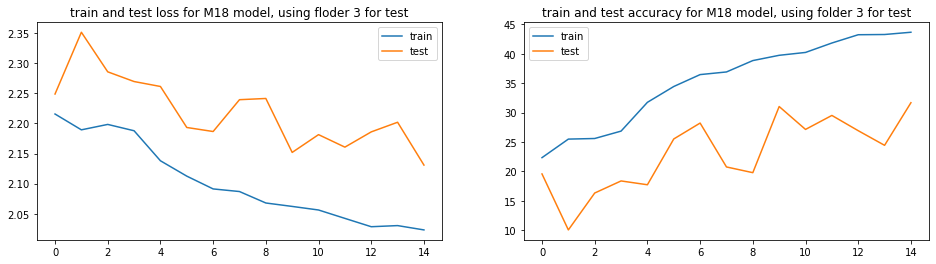

Epoch: 0
Train Accuracy: 21.42%
Test Accuracy: 15.454545454545453
Epoch: 1
Train Accuracy: 28.71%
Test Accuracy: 17.77777777777778
Epoch: 2
Train Accuracy: 32.39%
Test Accuracy: 14.545454545454545
Epoch: 3
Train Accuracy: 34.71%
Test Accuracy: 20.1010101010101
Epoch: 4
Train Accuracy: 34.82%
Test Accuracy: 21.616161616161616
Epoch: 5
Train Accuracy: 38.14%
Test Accuracy: 29.6969696969697
Epoch: 6
Train Accuracy: 39.43%
Test Accuracy: 21.11111111111111
Epoch: 7
Train Accuracy: 38.38%
Test Accuracy: 21.71717171717172
Epoch: 8
Train Accuracy: 39.80%
Test Accuracy: 22.02020202020202
Epoch: 9
Train Accuracy: 39.49%
Test Accuracy: 25.858585858585858
Epoch: 10
Train Accuracy: 41.37%
Test Accuracy: 21.01010101010101
Epoch: 11
Train Accuracy: 42.17%
Test Accuracy: 31.414141414141415
Epoch: 12
Train Accuracy: 42.69%
Test Accuracy: 26.767676767676768
Epoch: 13
Train Accuracy: 43.05%
Test Accuracy: 27.979797979797983
Epoch: 14
Train Accuracy: 44.25%
Test Accuracy: 30.707070707070706
The mean accur

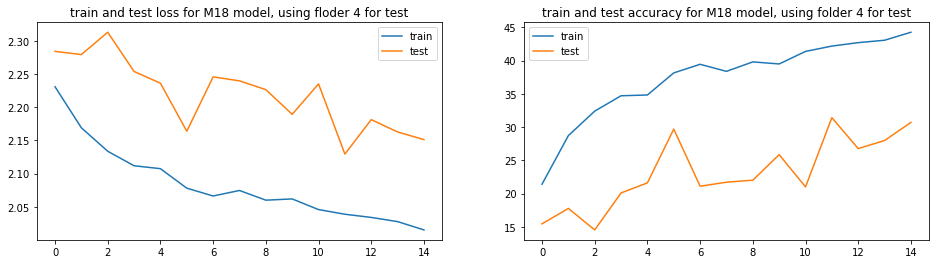

Epoch: 0
Train Accuracy: 21.58%
Test Accuracy: 14.850427342276287
Epoch: 1
Train Accuracy: 26.40%
Test Accuracy: 19.444444411840195
Epoch: 2
Train Accuracy: 27.50%
Test Accuracy: 15.918803378048105
Epoch: 3
Train Accuracy: 30.52%
Test Accuracy: 15.49145294254662
Epoch: 4
Train Accuracy: 32.58%
Test Accuracy: 23.824786259577827
Epoch: 5
Train Accuracy: 34.03%
Test Accuracy: 25.96153838002784
Epoch: 6
Train Accuracy: 35.79%
Test Accuracy: 29.38034174992488
Epoch: 7
Train Accuracy: 36.84%
Test Accuracy: 27.67094007312742
Epoch: 8
Train Accuracy: 39.06%
Test Accuracy: 29.700854651948323
Epoch: 9
Train Accuracy: 39.37%
Test Accuracy: 33.76068363026676
Epoch: 10
Train Accuracy: 40.58%
Test Accuracy: 27.350427301520973
Epoch: 11
Train Accuracy: 42.34%
Test Accuracy: 30.34188034188034
Epoch: 12
Train Accuracy: 43.12%
Test Accuracy: 32.15811959291116
Epoch: 13
Train Accuracy: 43.64%
Test Accuracy: 32.264957199748764
Epoch: 14
Train Accuracy: 45.02%
Test Accuracy: 32.05128192086505
The mean accu

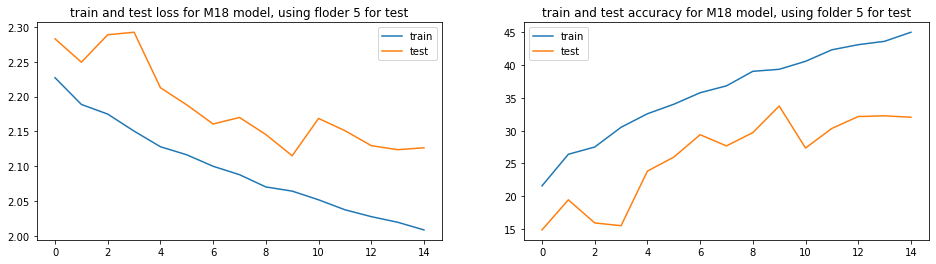

Epoch: 0
Train Accuracy: 21.71%
Test Accuracy: 20.534629399982144
Epoch: 1
Train Accuracy: 24.04%
Test Accuracy: 16.889428913955413
Epoch: 2
Train Accuracy: 27.98%
Test Accuracy: 28.068043733135607
Epoch: 3
Train Accuracy: 28.55%
Test Accuracy: 20.534629397664585
Epoch: 4
Train Accuracy: 29.75%
Test Accuracy: 23.45078977721575
Epoch: 5
Train Accuracy: 29.03%
Test Accuracy: 27.82503036276538
Epoch: 6
Train Accuracy: 28.87%
Test Accuracy: 28.068043737770722
Epoch: 7
Train Accuracy: 31.76%
Test Accuracy: 29.52612392522875
Epoch: 8
Train Accuracy: 32.32%
Test Accuracy: 26.123936802619575
Epoch: 9
Train Accuracy: 33.16%
Test Accuracy: 26.00243012902224
Epoch: 10
Train Accuracy: 33.24%
Test Accuracy: 25.880923436884455
Epoch: 11
Train Accuracy: 33.80%
Test Accuracy: 30.255164024751647
Epoch: 12
Train Accuracy: 34.63%
Test Accuracy: 26.488456853539805
Epoch: 13
Train Accuracy: 34.75%
Test Accuracy: 32.44228431405013
Epoch: 14
Train Accuracy: 36.02%
Test Accuracy: 32.68529768210281
The mean ac

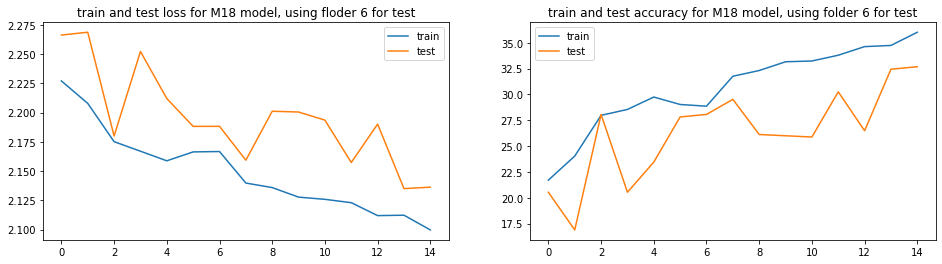

Epoch: 0
Train Accuracy: 23.60%
Test Accuracy: 18.73508352311528
Epoch: 1
Train Accuracy: 28.25%
Test Accuracy: 30.906921250154408
Epoch: 2
Train Accuracy: 31.52%
Test Accuracy: 25.775656297269467
Epoch: 3
Train Accuracy: 33.86%
Test Accuracy: 31.26491644957185
Epoch: 4
Train Accuracy: 36.28%
Test Accuracy: 37.350835308539274
Epoch: 5
Train Accuracy: 36.18%
Test Accuracy: 17.422434335676755
Epoch: 6
Train Accuracy: 36.43%
Test Accuracy: 35.32219566764012
Epoch: 7
Train Accuracy: 36.96%
Test Accuracy: 33.890214824448904
Epoch: 8
Train Accuracy: 39.23%
Test Accuracy: 32.816229080527954
Epoch: 9
Train Accuracy: 40.26%
Test Accuracy: 33.53221957951001
Epoch: 10
Train Accuracy: 39.14%
Test Accuracy: 27.088305475603708
Epoch: 11
Train Accuracy: 41.02%
Test Accuracy: 34.844868698666374
Epoch: 12
Train Accuracy: 42.27%
Test Accuracy: 36.87350838053482
Epoch: 13
Train Accuracy: 42.42%
Test Accuracy: 36.8735083987434
Epoch: 14
Train Accuracy: 43.60%
Test Accuracy: 37.47016704623056
The mean accu

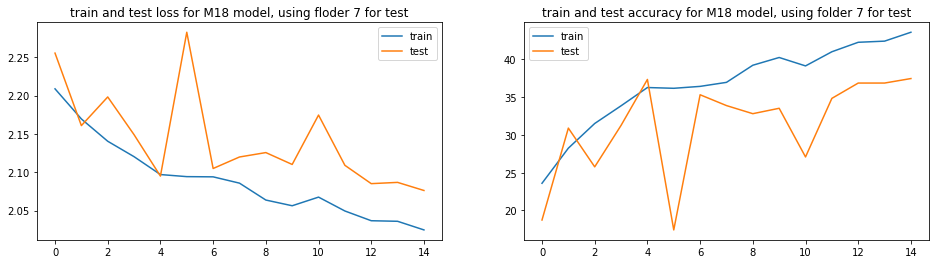

Epoch: 0
Train Accuracy: 20.58%
Test Accuracy: 15.136476426799009
Epoch: 1
Train Accuracy: 24.51%
Test Accuracy: 21.712158808933
Epoch: 2
Train Accuracy: 25.23%
Test Accuracy: 18.858560784578913
Epoch: 3
Train Accuracy: 26.65%
Test Accuracy: 27.419354829243925
Epoch: 4
Train Accuracy: 29.57%
Test Accuracy: 34.86352357320099
Epoch: 5
Train Accuracy: 32.88%
Test Accuracy: 33.126550868486355
Epoch: 6
Train Accuracy: 35.87%
Test Accuracy: 34.61538461065174
Epoch: 7
Train Accuracy: 37.79%
Test Accuracy: 32.50620346447966
Epoch: 8
Train Accuracy: 39.11%
Test Accuracy: 35.607940437184375
Epoch: 9
Train Accuracy: 41.61%
Test Accuracy: 37.09677418881551
Epoch: 10
Train Accuracy: 43.28%
Test Accuracy: 32.6302729528536
Epoch: 11
Train Accuracy: 43.94%
Test Accuracy: 32.38213398557147
Epoch: 12
Train Accuracy: 45.90%
Test Accuracy: 39.08188584661366
Epoch: 13
Train Accuracy: 47.43%
Test Accuracy: 46.65012406001316
Epoch: 14
Train Accuracy: 48.84%
Test Accuracy: 42.555831256042936
The mean accuracy

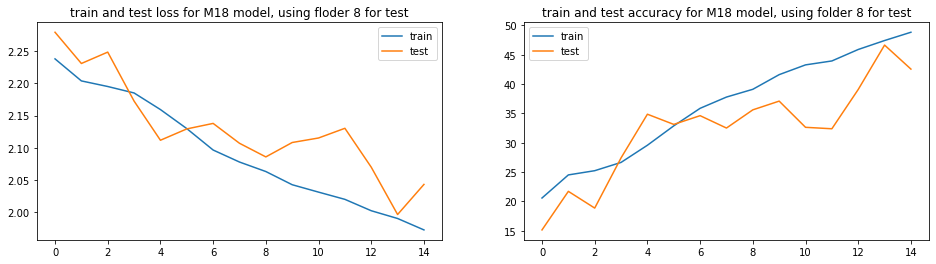

Epoch: 0
Train Accuracy: 18.47%
Test Accuracy: 11.519607843137255
Epoch: 1
Train Accuracy: 24.92%
Test Accuracy: 10.416666666666668
Epoch: 2
Train Accuracy: 26.71%
Test Accuracy: 21.323529411764707
Epoch: 3
Train Accuracy: 31.49%
Test Accuracy: 26.838235294117645
Epoch: 4
Train Accuracy: 34.92%
Test Accuracy: 21.44607843137255
Epoch: 5
Train Accuracy: 36.76%
Test Accuracy: 28.308823529411764
Epoch: 6
Train Accuracy: 37.06%
Test Accuracy: 28.186274509803923
Epoch: 7
Train Accuracy: 38.63%
Test Accuracy: 30.14705882352941
Epoch: 8
Train Accuracy: 39.09%
Test Accuracy: 38.84803921568628
Epoch: 9
Train Accuracy: 40.53%
Test Accuracy: 36.39705882352941
Epoch: 10
Train Accuracy: 41.68%
Test Accuracy: 30.637254901960787
Epoch: 11
Train Accuracy: 41.26%
Test Accuracy: 36.6421568627451
Epoch: 12
Train Accuracy: 42.09%
Test Accuracy: 32.35294117647059
Epoch: 13
Train Accuracy: 42.88%
Test Accuracy: 38.3578431372549
Epoch: 14
Train Accuracy: 43.89%
Test Accuracy: 31.862745098039213
The mean accur

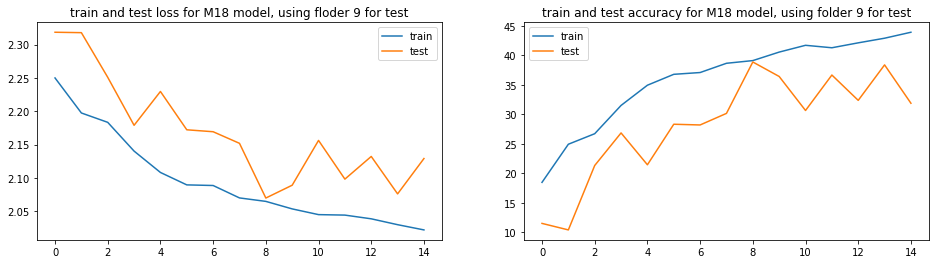

Epoch: 0
Train Accuracy: 22.69%
Test Accuracy: 25.806451667594228
Epoch: 1
Train Accuracy: 25.24%
Test Accuracy: 24.13381126704609
Epoch: 2
Train Accuracy: 28.65%
Test Accuracy: 25.80645163341235
Epoch: 3
Train Accuracy: 27.59%
Test Accuracy: 26.045400293639627
Epoch: 4
Train Accuracy: 30.39%
Test Accuracy: 25.20908005234731
Epoch: 5
Train Accuracy: 33.24%
Test Accuracy: 30.34647558068716
Epoch: 6
Train Accuracy: 36.15%
Test Accuracy: 20.191158903115113
Epoch: 7
Train Accuracy: 38.29%
Test Accuracy: 24.970131408071573
Epoch: 8
Train Accuracy: 37.63%
Test Accuracy: 32.85543615416386
Epoch: 9
Train Accuracy: 39.61%
Test Accuracy: 24.731182850389924
Epoch: 10
Train Accuracy: 40.49%
Test Accuracy: 27.359617736889323
Epoch: 11
Train Accuracy: 41.84%
Test Accuracy: 31.30227008486876
Epoch: 12
Train Accuracy: 42.65%
Test Accuracy: 31.78016730277769
Epoch: 13
Train Accuracy: 42.50%
Test Accuracy: 32.85543613593354
Epoch: 14
Train Accuracy: 44.34%
Test Accuracy: 37.514934380279506
The mean accu

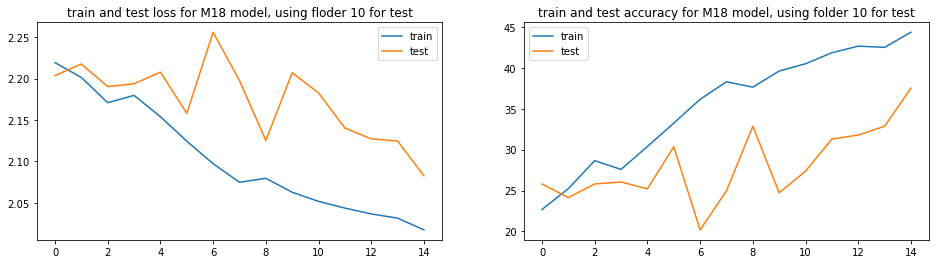

In [0]:
model_run_10(M18, 'M18')

# Train / Test M34Res #Bonus
#Plot Train / Accuracy values

Epoch: 0
Train Accuracy: 42.45%
Test Accuracy: 36.769759434878075
Epoch: 1
Train Accuracy: 57.76%
Test Accuracy: 50.40091631038356
Epoch: 2
Train Accuracy: 62.39%
Test Accuracy: 67.92668959365268
Epoch: 3
Train Accuracy: 67.32%
Test Accuracy: 62.199312684189145
Epoch: 4
Train Accuracy: 69.51%
Test Accuracy: 63.23024056730674
Epoch: 5
Train Accuracy: 72.50%
Test Accuracy: 63.688430716218534
Epoch: 6
Train Accuracy: 74.86%
Test Accuracy: 77.663230153157
Epoch: 7
Train Accuracy: 77.95%
Test Accuracy: 74.34135157354646
Epoch: 8
Train Accuracy: 79.49%
Test Accuracy: 77.31958754147314
Epoch: 9
Train Accuracy: 80.98%
Test Accuracy: 83.50515464791455
Epoch: 10
Train Accuracy: 82.18%
Test Accuracy: 78.46506286131694
Epoch: 11
Train Accuracy: 84.54%
Test Accuracy: 80.75601366705091
Epoch: 12
Train Accuracy: 85.17%
Test Accuracy: 85.91065283356937
Epoch: 13
Train Accuracy: 87.38%
Test Accuracy: 85.68155780280988
Epoch: 14
Train Accuracy: 88.71%
Test Accuracy: 83.16151194009858
The mean accuracy f

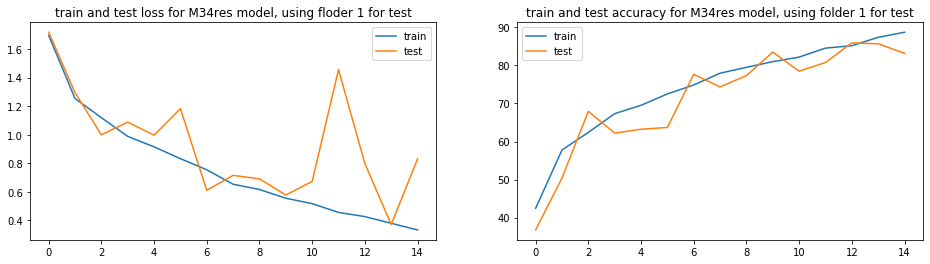

Epoch: 0
Train Accuracy: 44.57%
Test Accuracy: 35.02252254829751
Epoch: 1
Train Accuracy: 62.24%
Test Accuracy: 41.55405399391243
Epoch: 2
Train Accuracy: 66.87%
Test Accuracy: 40.65315311019485
Epoch: 3
Train Accuracy: 71.12%
Test Accuracy: 44.81981977686152
Epoch: 4
Train Accuracy: 73.69%
Test Accuracy: 48.64864860569035
Epoch: 5
Train Accuracy: 76.21%
Test Accuracy: 44.25675673957343
Epoch: 6
Train Accuracy: 79.00%
Test Accuracy: 50.22522522522522
Epoch: 7
Train Accuracy: 79.81%
Test Accuracy: 51.01351345337189
Epoch: 8
Train Accuracy: 82.66%
Test Accuracy: 54.279279193362676
Epoch: 9
Train Accuracy: 84.57%
Test Accuracy: 48.4234233632818
Epoch: 10
Train Accuracy: 85.25%
Test Accuracy: 54.729729703954746
Epoch: 11
Train Accuracy: 87.52%
Test Accuracy: 53.37837829246177
Epoch: 12
Train Accuracy: 88.62%
Test Accuracy: 58.33333316150012
Epoch: 13
Train Accuracy: 89.46%
Test Accuracy: 52.92792784201132
Epoch: 14
Train Accuracy: 90.88%
Test Accuracy: 55.18018022313848
The mean accuracy f

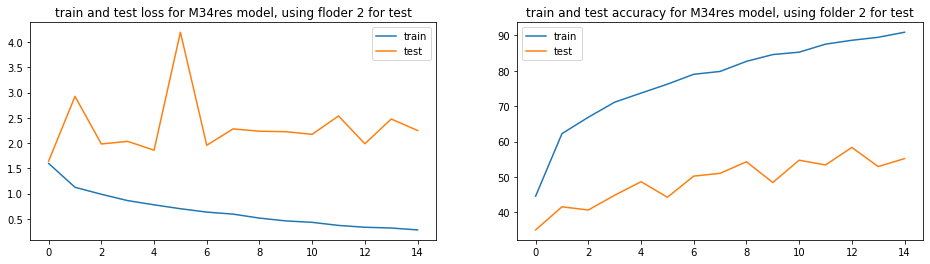

Epoch: 0
Train Accuracy: 43.91%
Test Accuracy: 28.324324324324323
Epoch: 1
Train Accuracy: 60.51%
Test Accuracy: 33.83783783783784
Epoch: 2
Train Accuracy: 66.61%
Test Accuracy: 36.75675675675676
Epoch: 3
Train Accuracy: 69.92%
Test Accuracy: 32.648648648648646
Epoch: 4
Train Accuracy: 72.68%
Test Accuracy: 46.81081081081081
Epoch: 5
Train Accuracy: 75.86%
Test Accuracy: 49.83783783783784
Epoch: 6
Train Accuracy: 77.66%
Test Accuracy: 45.62162162162162
Epoch: 7
Train Accuracy: 79.21%
Test Accuracy: 45.83783783783784
Epoch: 8
Train Accuracy: 81.86%
Test Accuracy: 51.35135135135135
Epoch: 9
Train Accuracy: 83.84%
Test Accuracy: 51.67567567567568
Epoch: 10
Train Accuracy: 84.62%
Test Accuracy: 39.78378378378378
Epoch: 11
Train Accuracy: 86.35%
Test Accuracy: 51.891891891891895
Epoch: 12
Train Accuracy: 87.40%
Test Accuracy: 46.5945945945946
Epoch: 13
Train Accuracy: 88.60%
Test Accuracy: 52.756756756756765
Epoch: 14
Train Accuracy: 89.60%
Test Accuracy: 48.21621621621622
The mean accuracy

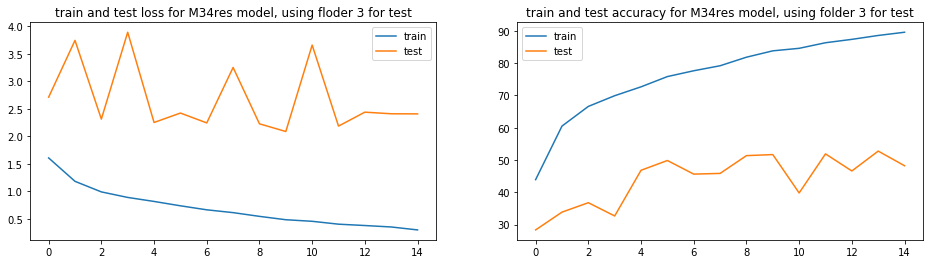

Epoch: 0
Train Accuracy: 44.38%
Test Accuracy: 34.24242424242424
Epoch: 1
Train Accuracy: 59.27%
Test Accuracy: 53.73737373737374
Epoch: 2
Train Accuracy: 65.09%
Test Accuracy: 44.04040404040404
Epoch: 3
Train Accuracy: 70.37%
Test Accuracy: 47.17171717171717
Epoch: 4
Train Accuracy: 73.04%
Test Accuracy: 53.03030303030303
Epoch: 5
Train Accuracy: 76.07%
Test Accuracy: 50.80808080808082
Epoch: 6
Train Accuracy: 79.18%
Test Accuracy: 50.505050505050505
Epoch: 7
Train Accuracy: 80.83%
Test Accuracy: 43.53535353535353
Epoch: 8
Train Accuracy: 82.92%
Test Accuracy: 55.05050505050505
Epoch: 9
Train Accuracy: 83.96%
Test Accuracy: 49.898989898989896
Epoch: 10
Train Accuracy: 85.46%
Test Accuracy: 61.41414141414141
Epoch: 11
Train Accuracy: 86.84%
Test Accuracy: 63.030303030303024
Epoch: 12
Train Accuracy: 87.96%
Test Accuracy: 58.88888888888889
Epoch: 13
Train Accuracy: 88.92%
Test Accuracy: 57.27272727272727
Epoch: 14
Train Accuracy: 89.65%
Test Accuracy: 68.38383838383838
The mean accuracy

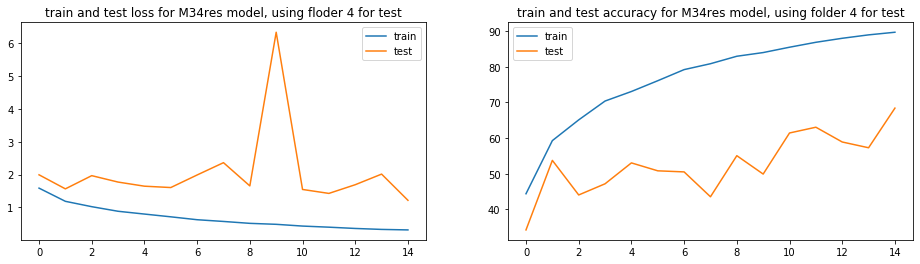

Epoch: 0
Train Accuracy: 42.62%
Test Accuracy: 35.790598274296165
Epoch: 1
Train Accuracy: 60.16%
Test Accuracy: 46.26068376068376
Epoch: 2
Train Accuracy: 65.39%
Test Accuracy: 56.73076910035223
Epoch: 3
Train Accuracy: 70.91%
Test Accuracy: 53.205128074711205
Epoch: 4
Train Accuracy: 73.08%
Test Accuracy: 58.012820480216256
Epoch: 5
Train Accuracy: 75.86%
Test Accuracy: 60.256410125993256
Epoch: 6
Train Accuracy: 78.44%
Test Accuracy: 52.457264843150085
Epoch: 7
Train Accuracy: 79.59%
Test Accuracy: 49.2521367195325
Epoch: 8
Train Accuracy: 81.46%
Test Accuracy: 67.2008544400207
Epoch: 9
Train Accuracy: 83.02%
Test Accuracy: 62.28632465590779
Epoch: 10
Train Accuracy: 85.21%
Test Accuracy: 68.37606811523438
Epoch: 11
Train Accuracy: 86.25%
Test Accuracy: 50.42735036214193
Epoch: 12
Train Accuracy: 87.57%
Test Accuracy: 67.62820506299663
Epoch: 13
Train Accuracy: 89.32%
Test Accuracy: 57.47863247863248
Epoch: 14
Train Accuracy: 90.17%
Test Accuracy: 65.91880332099066
The mean accuracy

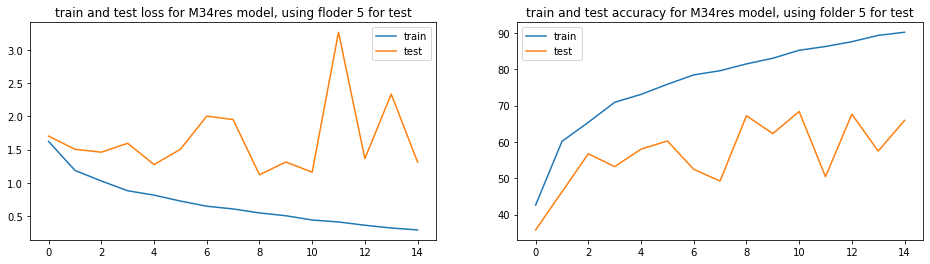

Epoch: 0
Train Accuracy: 45.19%
Test Accuracy: 33.292831091805475
Epoch: 1
Train Accuracy: 58.19%
Test Accuracy: 49.69623326965555
Epoch: 2
Train Accuracy: 65.84%
Test Accuracy: 45.565005991902126
Epoch: 3
Train Accuracy: 70.12%
Test Accuracy: 52.004860183882684
Epoch: 4
Train Accuracy: 72.78%
Test Accuracy: 47.75212634377463
Epoch: 5
Train Accuracy: 75.22%
Test Accuracy: 46.78007287619905
Epoch: 6
Train Accuracy: 77.87%
Test Accuracy: 41.91980557771963
Epoch: 7
Train Accuracy: 79.74%
Test Accuracy: 51.032806785833785
Epoch: 8
Train Accuracy: 81.21%
Test Accuracy: 49.57472659605821
Epoch: 9
Train Accuracy: 82.35%
Test Accuracy: 39.489671918050924
Epoch: 10
Train Accuracy: 84.59%
Test Accuracy: 60.02430135511396
Epoch: 11
Train Accuracy: 85.32%
Test Accuracy: 54.43499389685519
Epoch: 12
Train Accuracy: 86.89%
Test Accuracy: 60.145807986995294
Epoch: 13
Train Accuracy: 88.39%
Test Accuracy: 61.36087481567086
Epoch: 14
Train Accuracy: 89.35%
Test Accuracy: 61.603888181405985
The mean accu

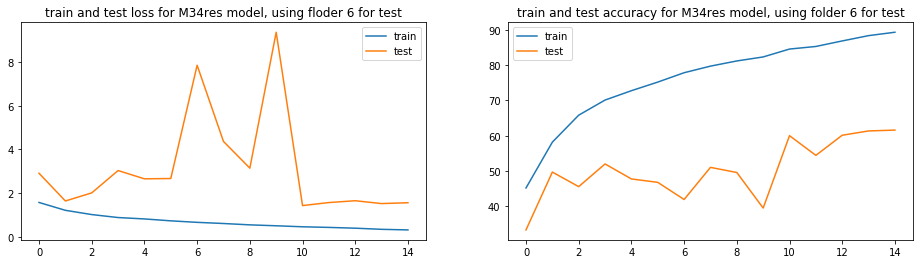

Epoch: 0
Train Accuracy: 46.30%
Test Accuracy: 41.88544146371627
Epoch: 1
Train Accuracy: 60.59%
Test Accuracy: 43.31742243436754
Epoch: 2
Train Accuracy: 65.95%
Test Accuracy: 47.971360400070154
Epoch: 3
Train Accuracy: 69.71%
Test Accuracy: 52.62529823831271
Epoch: 4
Train Accuracy: 73.92%
Test Accuracy: 45.704057215506246
Epoch: 5
Train Accuracy: 76.30%
Test Accuracy: 43.31742243436754
Epoch: 6
Train Accuracy: 78.49%
Test Accuracy: 52.9832935742945
Epoch: 7
Train Accuracy: 80.21%
Test Accuracy: 59.66587109440551
Epoch: 8
Train Accuracy: 82.63%
Test Accuracy: 55.13126487094634
Epoch: 9
Train Accuracy: 84.13%
Test Accuracy: 57.756563172989075
Epoch: 10
Train Accuracy: 84.96%
Test Accuracy: 55.25059663139835
Epoch: 11
Train Accuracy: 86.52%
Test Accuracy: 61.45584709149271
Epoch: 12
Train Accuracy: 87.61%
Test Accuracy: 56.08591878158096
Epoch: 13
Train Accuracy: 89.14%
Test Accuracy: 57.99522663926737
Epoch: 14
Train Accuracy: 90.12%
Test Accuracy: 58.114558381510804
The mean accuracy

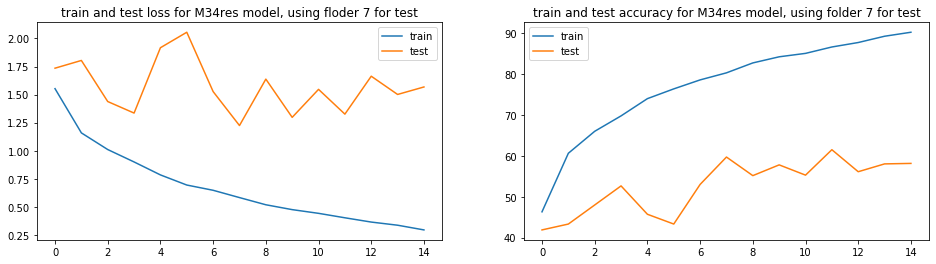

Epoch: 0
Train Accuracy: 45.05%
Test Accuracy: 41.56327542477743
Epoch: 1
Train Accuracy: 60.12%
Test Accuracy: 48.759305210918114
Epoch: 2
Train Accuracy: 66.63%
Test Accuracy: 44.91315136476427
Epoch: 3
Train Accuracy: 70.30%
Test Accuracy: 52.48138956869802
Epoch: 4
Train Accuracy: 73.93%
Test Accuracy: 52.48138955923227
Epoch: 5
Train Accuracy: 77.11%
Test Accuracy: 51.61290322580645
Epoch: 6
Train Accuracy: 79.50%
Test Accuracy: 53.10173695377321
Epoch: 7
Train Accuracy: 81.16%
Test Accuracy: 52.23325062034739
Epoch: 8
Train Accuracy: 83.16%
Test Accuracy: 61.53846153846154
Epoch: 9
Train Accuracy: 84.19%
Test Accuracy: 57.19602977667494
Epoch: 10
Train Accuracy: 85.76%
Test Accuracy: 53.84615384615385
Epoch: 11
Train Accuracy: 86.66%
Test Accuracy: 51.86104218362283
Epoch: 12
Train Accuracy: 88.03%
Test Accuracy: 56.94789081885856
Epoch: 13
Train Accuracy: 88.95%
Test Accuracy: 56.451612903225815
Epoch: 14
Train Accuracy: 90.35%
Test Accuracy: 58.188585607940446
The mean accuracy

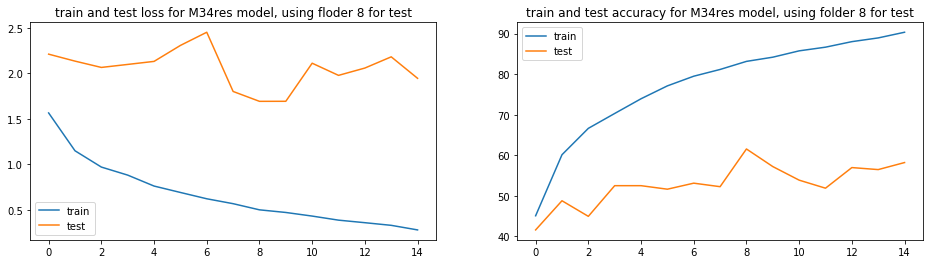

Epoch: 0
Train Accuracy: 43.66%
Test Accuracy: 46.44607843137255
Epoch: 1
Train Accuracy: 57.73%
Test Accuracy: 51.71568627450981
Epoch: 2
Train Accuracy: 63.97%
Test Accuracy: 51.34803921568627
Epoch: 3
Train Accuracy: 67.77%
Test Accuracy: 59.681372549019606
Epoch: 4
Train Accuracy: 71.08%
Test Accuracy: 52.20588235294118
Epoch: 5
Train Accuracy: 73.72%
Test Accuracy: 62.5
Epoch: 6
Train Accuracy: 76.30%
Test Accuracy: 61.642156862745104
Epoch: 7
Train Accuracy: 77.82%
Test Accuracy: 62.745098039215684
Epoch: 8
Train Accuracy: 79.74%
Test Accuracy: 60.29411764705882
Epoch: 9
Train Accuracy: 81.04%
Test Accuracy: 62.13235294117647
Epoch: 10
Train Accuracy: 82.98%
Test Accuracy: 55.88235294117647
Epoch: 11
Train Accuracy: 84.58%
Test Accuracy: 64.82843137254902
Epoch: 12
Train Accuracy: 86.12%
Test Accuracy: 57.720588235294116
Epoch: 13
Train Accuracy: 86.98%
Test Accuracy: 65.19607843137256
Epoch: 14
Train Accuracy: 88.34%
Test Accuracy: 65.31862745098039
The mean accuracy for the val

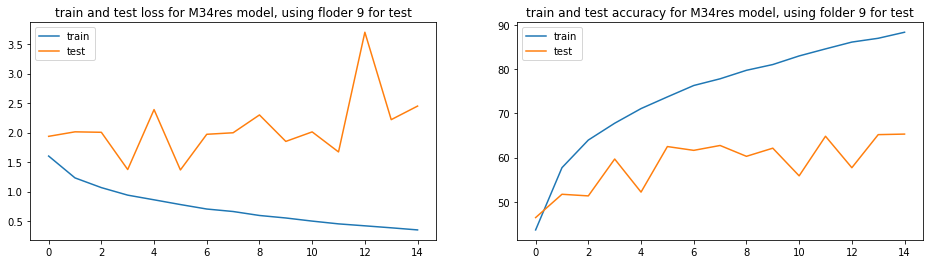

Epoch: 0
Train Accuracy: 41.94%
Test Accuracy: 37.27598573600377
Epoch: 1
Train Accuracy: 56.72%
Test Accuracy: 47.909199563121
Epoch: 2
Train Accuracy: 63.37%
Test Accuracy: 52.92712067817131
Epoch: 3
Train Accuracy: 66.85%
Test Accuracy: 45.7586619287124
Epoch: 4
Train Accuracy: 70.58%
Test Accuracy: 59.02031066055936
Epoch: 5
Train Accuracy: 72.34%
Test Accuracy: 58.90083644780349
Epoch: 6
Train Accuracy: 75.41%
Test Accuracy: 62.84348857701894
Epoch: 7
Train Accuracy: 78.21%
Test Accuracy: 58.30346491915066
Epoch: 8
Train Accuracy: 79.63%
Test Accuracy: 67.38351272710621
Epoch: 9
Train Accuracy: 81.41%
Test Accuracy: 61.64874559719217
Epoch: 10
Train Accuracy: 82.81%
Test Accuracy: 59.378733599627466
Epoch: 11
Train Accuracy: 83.53%
Test Accuracy: 61.8876941913345
Epoch: 12
Train Accuracy: 84.95%
Test Accuracy: 59.85663090185168
Epoch: 13
Train Accuracy: 86.50%
Test Accuracy: 71.20669050683827
Epoch: 14
Train Accuracy: 87.28%
Test Accuracy: 65.94982086600938
The mean accuracy for t

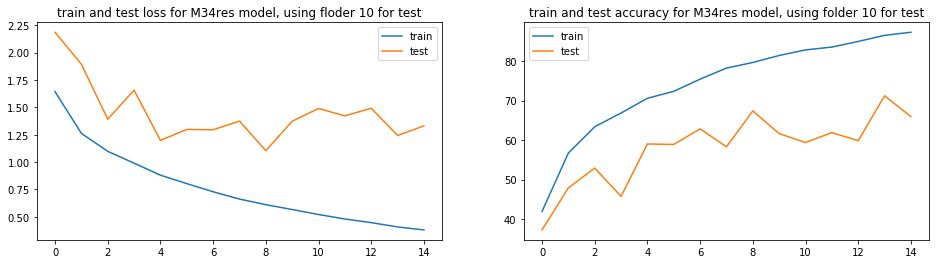

In [0]:
model_run_10(M34res, 'M34res')